# Master in Applied Artificial Intelligence

## Course: *Fintech and Digital Innovation in Finance*

### **Course Project – Part 1**
### Text Embeddings and Technical Analysis on S&P 500 Data (*Section B*)

---

**Institution:** Tecnológico de Monterrey

**Instructors:** Marie-Ève Malette, Yetnalezi Quintas Ruiz

**Author:** Alejandro Díaz Villagómez | A01276769

**Date:** July 28th, 2025

---

# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
# !pip install -q yfinance pandas lxml tqdm sentence-transformers ipywidgets scikit-learn matplotlib
# !pip freeze > ../requirements.txt

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500 

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
display(df_tickers.head())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
ticker_list = df_tickers['Symbol'].tolist()
print("Sample tickers:", ticker_list[:10])

Sample tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [5]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [6]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices 
# Make sure you end this coding section by displaying your results: display(df_close)

# Download historical data for the tickers
tickers_string = " ".join(ticker_list)
df_all = yf.download(tickers=tickers_string, start=start_date, end=end_date, group_by='ticker', auto_adjust=True)

# Create a dictionary to hold the closing prices for each ticker
close_dict = {}

for ticker in ticker_list:
    try:
        close_series = df_all[ticker]['Close']
        close_dict[ticker] = close_series
    except Exception as e:
        print(f"Skipping {ticker} due to error: {e}")

# Convert the dictionary to a DataFrame
df_close = pd.concat(close_dict, axis=1)

# Preview the resulting DataFrame
print("Closing prices DataFrame shape:", df_close.shape)
print("-" * 50)
display(df_close.head())

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


Closing prices DataFrame shape: (250, 503)
--------------------------------------------------


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,95.778587,81.281311,103.735458,154.714798,293.442108,469.390015,144.270004,17.218021,82.391678,137.376282,...,36.111881,250.928619,244.960007,91.453217,51.484390,129.094406,132.078354,309.049988,118.202545,156.223282
2024-05-02,94.192650,82.027466,103.374336,153.844193,295.092773,476.570007,146.160004,17.938202,81.875336,136.217361,...,36.731377,248.751343,250.850006,93.958229,51.493969,134.052750,131.824585,312.709991,117.115036,164.827896
2024-05-03,94.523460,82.773613,103.354828,156.695099,298.403870,486.179993,150.600006,17.691824,81.066719,138.129089,...,36.855274,248.258743,255.779999,95.378395,51.934326,135.255371,131.112137,309.589996,120.278717,164.670197
2024-05-06,93.978592,83.598312,103.101074,155.681015,300.712830,493.589996,155.779999,17.890821,82.547562,139.278091,...,37.226978,249.322769,249.910004,96.522446,52.039631,137.217026,132.907913,315.790009,119.191208,163.566284
2024-05-07,92.956993,83.667038,103.618332,155.508835,305.232483,492.269989,154.429993,17.852917,82.498840,139.931839,...,37.274624,251.086227,249.429993,95.891251,52.671459,138.035187,132.644409,317.869995,120.051323,166.030365


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [7]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)

df_ma50 = df_close.rolling(window=50).mean()
print("50-day Moving Average:")
print("-" * 50)
display(df_ma50.tail())

50-day Moving Average:
--------------------------------------------------


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,143.654412,65.219248,129.695852,194.882049,322.755805,401.392800,100.5516,11.069880,106.393994,118.589774,...,56.881934,325.769607,243.521401,82.616266,68.725403,120.092335,151.386326,277.851799,105.303733,158.931156
2025-04-25,143.439081,65.214074,129.675178,194.779480,320.885378,399.492000,100.2502,11.069094,106.504835,117.960953,...,56.975110,325.452575,243.153601,82.695181,68.768236,119.825021,151.415763,275.718199,105.358225,158.535974
2025-04-28,143.238862,65.189798,129.642279,194.792595,318.998219,397.680000,99.9418,11.070076,106.604067,117.376369,...,57.028886,325.088865,242.747401,82.734114,68.802902,119.530667,151.409785,274.119598,105.399390,158.320587
2025-04-29,143.035060,65.205716,129.652079,194.840304,317.245909,395.896400,99.6010,11.078721,106.720124,116.839011,...,57.092296,324.750376,242.454201,82.593967,68.855058,119.324127,151.419251,272.873398,105.448960,158.289487
2025-04-30,142.834443,65.255185,129.675380,194.853134,315.515956,394.113801,99.2624,11.073023,106.819574,116.293892,...,57.117771,324.479385,242.039801,82.381536,68.909186,119.126358,151.498900,271.258199,105.470672,158.298382


In [8]:
df_ma200 = df_close.rolling(window=200).mean()
print("200-day Moving Average:")
print("-" * 50)
display(df_ma200.tail())

200-day Moving Average:
--------------------------------------------------


,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,132.609984,73.531205,116.973860,183.261853,340.475853,478.509449,131.58170,13.862819,104.768169,133.080366,...,51.156786,303.742411,247.403701,85.165791,64.041626,125.549299,136.723923,346.199799,106.728763,172.881444
2025-04-25,132.804895,73.458212,117.119245,183.380334,340.478540,477.517949,131.17945,13.828417,104.869224,132.988337,...,51.245133,303.976909,247.485901,85.156247,64.130068,125.467794,136.835707,345.854800,106.711042,172.787551
2025-04-28,132.993143,73.373080,117.261134,183.529515,340.493398,476.538299,130.74160,13.793564,104.966743,132.891064,...,51.336073,304.212190,247.569601,85.151355,64.220807,125.371802,136.937422,345.453200,106.688920,172.697852
2025-04-29,133.175987,73.283924,117.402337,183.676030,340.515408,475.605049,130.31220,13.756137,105.053982,132.778128,...,51.426243,304.425549,247.652501,85.139760,64.309746,125.281706,137.037122,345.091850,106.665544,172.596478
2025-04-30,133.357501,73.192076,117.544590,183.828657,340.478451,474.684699,129.89090,13.715756,105.140541,132.658895,...,51.509465,304.654058,247.727401,85.115950,64.397867,125.198611,137.141726,344.717500,106.640987,172.493530


### Detecting Golden and Death Crosses in the last 14 days

In [9]:
# CODE HERE
# Use as many coding cells as you need

# define a function that detects golden and death crosses in the last 14 days for all stocks 

def detect_crosses_last_n_days(df_ma50, df_ma200, num_days=14):
    """
    Detects Golden and Death Crosses in the last `num_days` for all tickers.

    Returns:
        df_crosses: DataFrame with columns ['TICKER', 'DATE', 'TYPE'] 
    """
    golden_crosses = []
    death_crosses = []

    # Ensure both DataFrames have the same tickers
    tickers = list(set(df_ma50.columns) & set(df_ma200.columns))
    df_ma50_recent = df_ma50[tickers].tail(num_days + 1)
    df_ma200_recent = df_ma200[tickers].tail(num_days + 1)

    for ticker in tickers:
        ma50 = df_ma50_recent[ticker]
        ma200 = df_ma200_recent[ticker]

        for i in range(1, len(ma50)):
            # Verify that none of the moving averages are NaN
            if pd.isna(ma50.iloc[i-1]) or pd.isna(ma200.iloc[i-1]) or pd.isna(ma50.iloc[i]) or pd.isna(ma200.iloc[i]):
                continue
            
            prev_ma50 = ma50.iloc[i-1]
            curr_ma50 = ma50.iloc[i]
            prev_ma200 = ma200.iloc[i-1]
            curr_ma200 = ma200.iloc[i]
            date = ma50.index[i].strftime('%Y-%m-%d')

            # A Golden Cross occurs when the 50-day MA crosses above the 200-day MA
            if (prev_ma50 < prev_ma200) and (curr_ma50 > curr_ma200):
                golden_crosses.append((ticker, date, 'Golden Cross'))

            # A Death Cross occurs when the 50-day MA crosses below the 200-day MA
            elif (prev_ma50 > prev_ma200) and (curr_ma50 < curr_ma200):
                death_crosses.append((ticker, date, 'Death Cross'))

    df_crosses = pd.DataFrame(golden_crosses + death_crosses, columns=["TICKER", "DATE", "TYPE"])
    return df_crosses

In [10]:
df_crosses_14d = detect_crosses_last_n_days(df_ma50, df_ma200, num_days=14)

# Separate Golden and Death Crosses
df_golden_cross_14d = df_crosses_14d[df_crosses_14d["TYPE"] == "Golden Cross"].sort_values("TICKER")
df_death_cross_14d = df_crosses_14d[df_crosses_14d["TYPE"] == "Death Cross"].sort_values("TICKER")

In [11]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

# Mostrar resultados intermedios
display(df_golden_cross_14d)

,TICKER,DATE,TYPE
0,AMT,2025-04-21,Golden Cross
5,CI,2025-04-30,Golden Cross
7,EW,2025-04-17,Golden Cross
6,INVH,2025-04-30,Golden Cross
8,KDP,2025-04-21,Golden Cross
1,MDLZ,2025-04-28,Golden Cross
4,MOH,2025-04-28,Golden Cross
3,NEM,2025-04-14,Golden Cross
2,SBAC,2025-04-29,Golden Cross
9,SJM,2025-04-25,Golden Cross


In [12]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)

display(df_death_cross_14d)

,TICKER,DATE,TYPE
46,ACN,2025-04-10,Death Cross
42,ADSK,2025-04-11,Death Cross
11,AME,2025-04-22,Death Cross
57,AMP,2025-04-24,Death Cross
47,AMZN,2025-04-22,Death Cross
...,...,...,...
28,UNP,2025-04-16,Death Cross
43,VST,2025-04-30,Death Cross
62,WAB,2025-04-21,Death Cross
15,WAT,2025-04-28,Death Cross


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [13]:
print("Golden Crosses")
print("First 10 companies (alphabetical order) with a Golden Cross in the last 14 days:")
print("-" * 50)
for ticker in df_golden_cross_14d["TICKER"].unique()[:10]:
    print(f"- {ticker}")

Golden Crosses
First 10 companies (alphabetical order) with a Golden Cross in the last 14 days:
--------------------------------------------------
- AMT
- CI
- EW
- INVH
- KDP
- MDLZ
- MOH
- NEM
- SBAC
- SJM


**RESPONSE**:

First companies (alphabetical order) with a Golden Cross in the last 14 days:
- AMT
- CI
- EW
- INVH
- KDP
- MDLZ
- MOH
- NEM
- SBAC
- SJM

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

In [14]:
print("#### Death Crosses")
print("First 10 companies (alphabetical order) with a Death Cross in the last 14 days:")
print("-" * 50)
for ticker in df_death_cross_14d["TICKER"].unique()[:10]:
    print(f"- {ticker}")

#### Death Crosses
First 10 companies (alphabetical order) with a Death Cross in the last 14 days:
--------------------------------------------------
- ACN
- ADSK
- AME
- AMP
- AMZN
- APD
- APO
- AXP
- BAC
- BLK


**RESPONSE**:

First 10 companies (alphabetical order) with a Death Cross in the last 14 days:

- ACN
- ADSK
- AME
- AMP
- AMZN
- APD
- APO
- AXP
- BAC
- BLK

### Visualization of the results
(in alphabetical order)

In [15]:
def plot_crosses(ticker, df_close, df_ma50, df_ma200, cross_dates=None, window=60):
    """
    Plot closing price with 50 and 200 day moving averages, highlighting any crossovers.

    Args:
        ticker (str): Stock symbol to plot.
        df_close (pd.DataFrame): Close prices.
        df_ma50 (pd.DataFrame): 50-day moving average.
        df_ma200 (pd.DataFrame): 200-day moving average.
        cross_dates (list of str): Dates (YYYY-MM-DD) where crosses occurred for this ticker.
        window (int): Number of recent days to plot.
    """
    if ticker not in df_close.columns:
        print(f"{ticker} not found.")
        return
    
    # Slice data for the ticker
    close = df_close[ticker].dropna().tail(window)
    ma50 = df_ma50[ticker].dropna().tail(window)
    ma200 = df_ma200[ticker].dropna().tail(window)

    plt.figure(figsize=(12, 6))
    plt.plot(close.index, close, label='Close Price', linewidth=1.5)
    plt.plot(ma50.index, ma50, label='MA50', linestyle='--', linewidth=1.2)
    plt.plot(ma200.index, ma200, label='MA200', linestyle='--', linewidth=1.2)

    # Plot crossover points
    if cross_dates:
        for date in cross_dates:
            if date in close.index:
                plt.axvline(pd.to_datetime(date), color='red', linestyle=':', alpha=0.6)
                plt.text(pd.to_datetime(date), close.max()*0.95, 'Cross', rotation=90, color='red', fontsize=9)

    plt.title(f"{ticker} - Close Price with MA50 & MA200")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
# # Sample ticker to plot
# example_ticker = df_golden_cross_14d["TICKER"].iloc[0]

# # Extract the dates of the golden crosses for this ticker
# cross_dates = df_golden_cross_14d[df_golden_cross_14d["TICKER"] == example_ticker]["DATE"].tolist()

# plot_crosses(example_ticker, df_close, df_ma50, df_ma200, cross_dates)

In [17]:
def visualize_multiple_crosses(df_close, df_ma50, df_ma200, df_crosses, df_crosses_type, top_n=10):
    """
    Visualize Golden or Death Crosses for the first N tickers in alphabetical order.

    Args:
        df_close (pd.DataFrame): Close prices.
        df_ma50 (pd.DataFrame): 50-day moving average.
        df_ma200 (pd.DataFrame): 200-day moving average.
        df_crosses (pd.DataFrame): DataFrame with columns ['TICKER', 'DATE'].
        df_crosses_type (str): 'Golden Cross' or 'Death Cross'.
        top_n (int): Number of tickers to visualize.
    """
    assert df_crosses_type in ['Golden Cross', 'Death Cross'], "Invalid cross type"

    # Ordenar y seleccionar primeros tickers
    tickers = sorted(df_crosses["TICKER"].unique())[:top_n]

    # Título visual
    emoji = "📈" if df_crosses_type == "Golden Cross" else "📉"
    print(f"{emoji} {df_crosses_type} Visualizations")

    for ticker in tickers:
        dates = df_crosses[df_crosses["TICKER"] == ticker]["DATE"].tolist()
        print(f"\n--- {ticker} ---")
        plot_crosses(ticker, df_close, df_ma50, df_ma200, cross_dates=dates)

📈 Golden Cross Visualizations

--- AMT ---


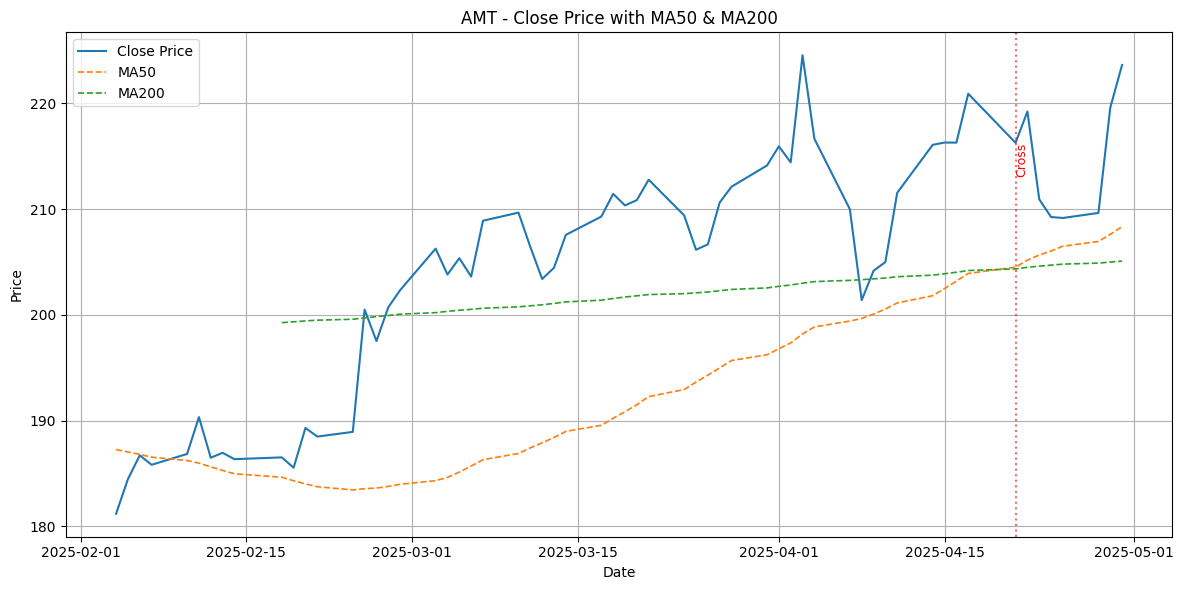


--- CI ---


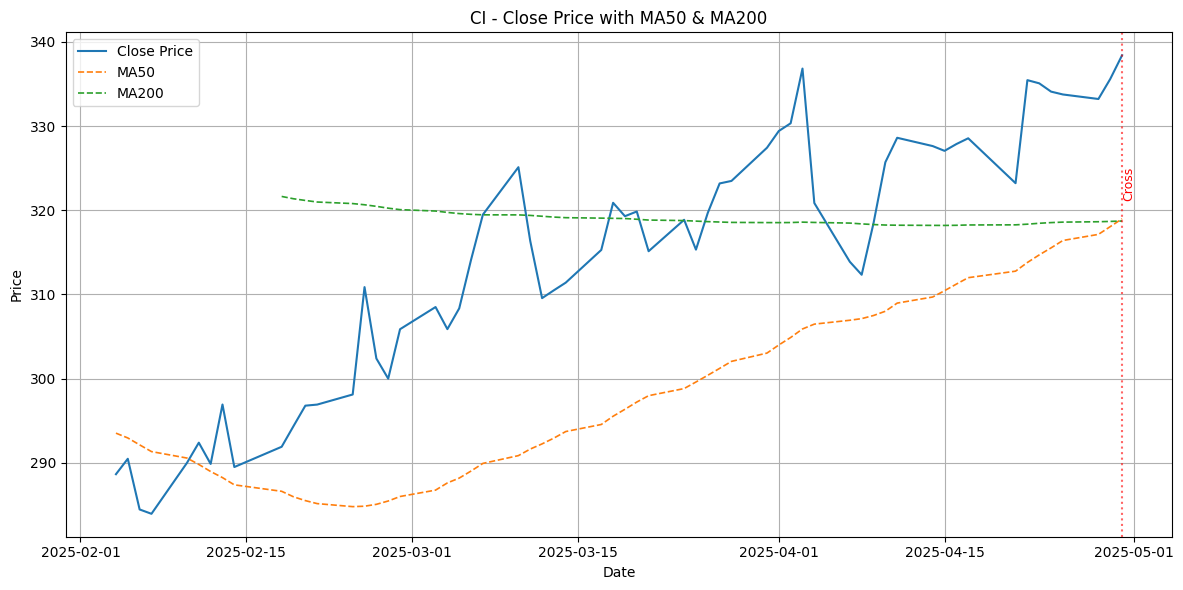


--- EW ---


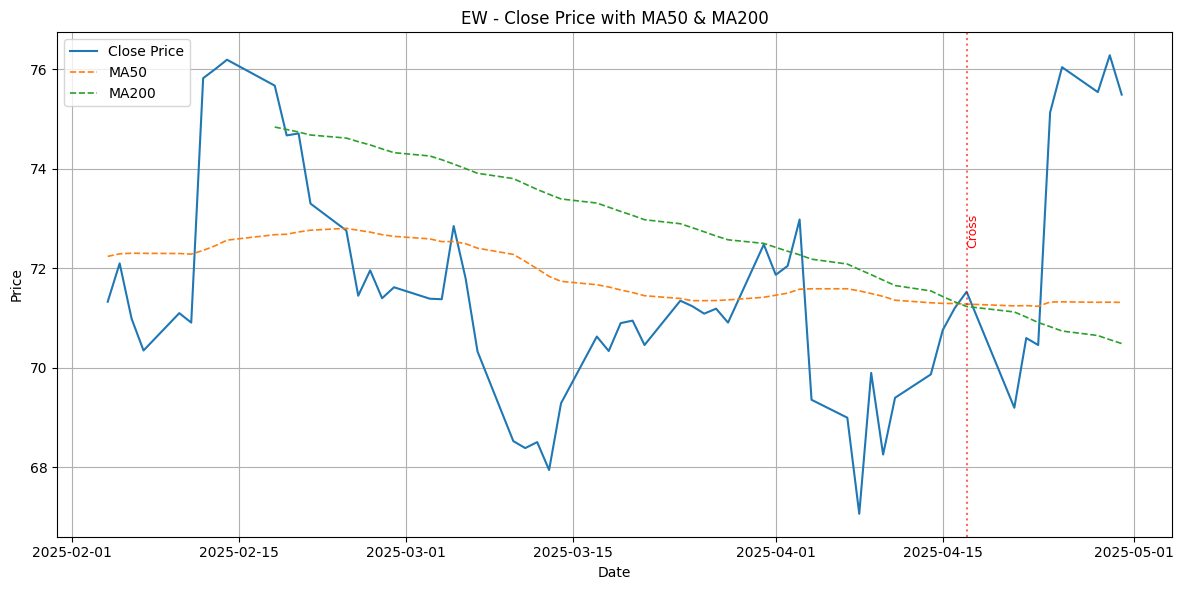


--- INVH ---


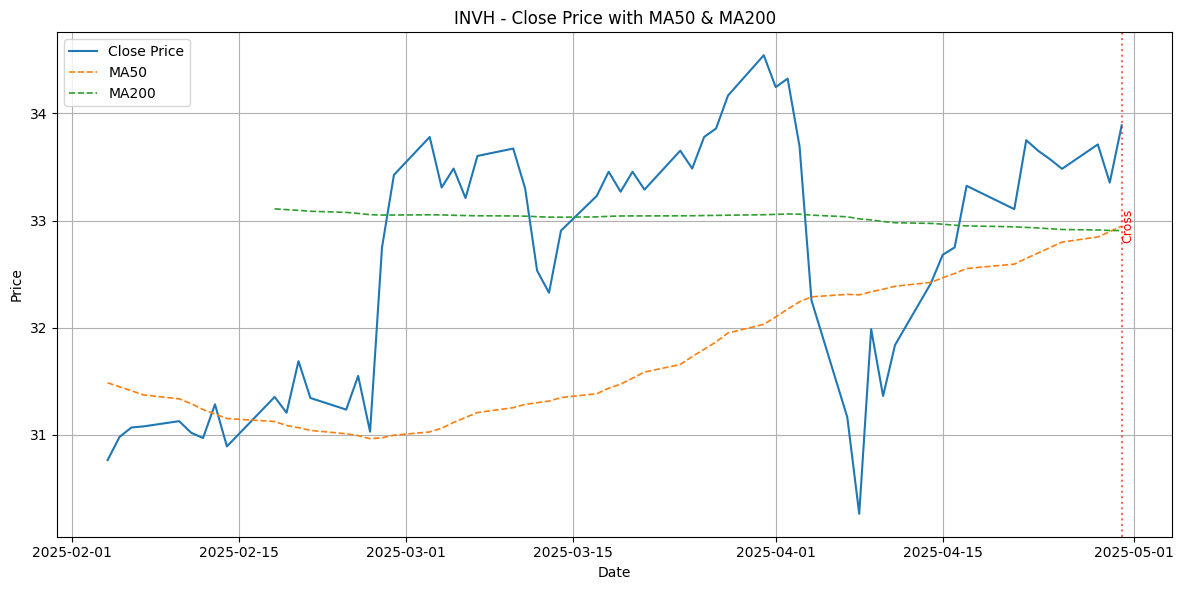


--- KDP ---


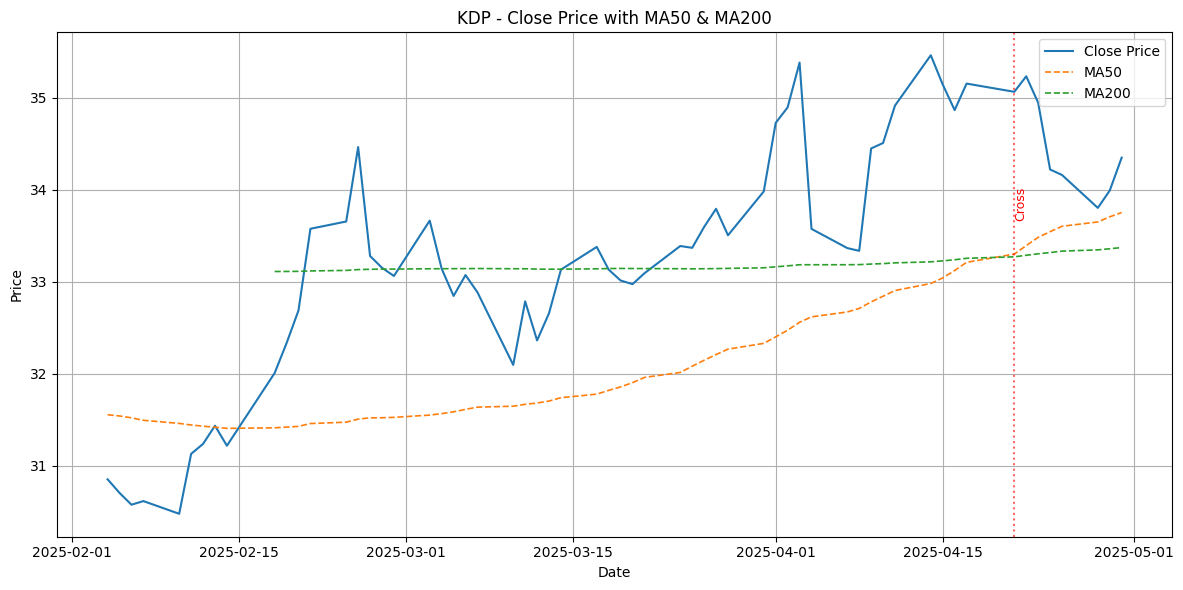


--- MDLZ ---


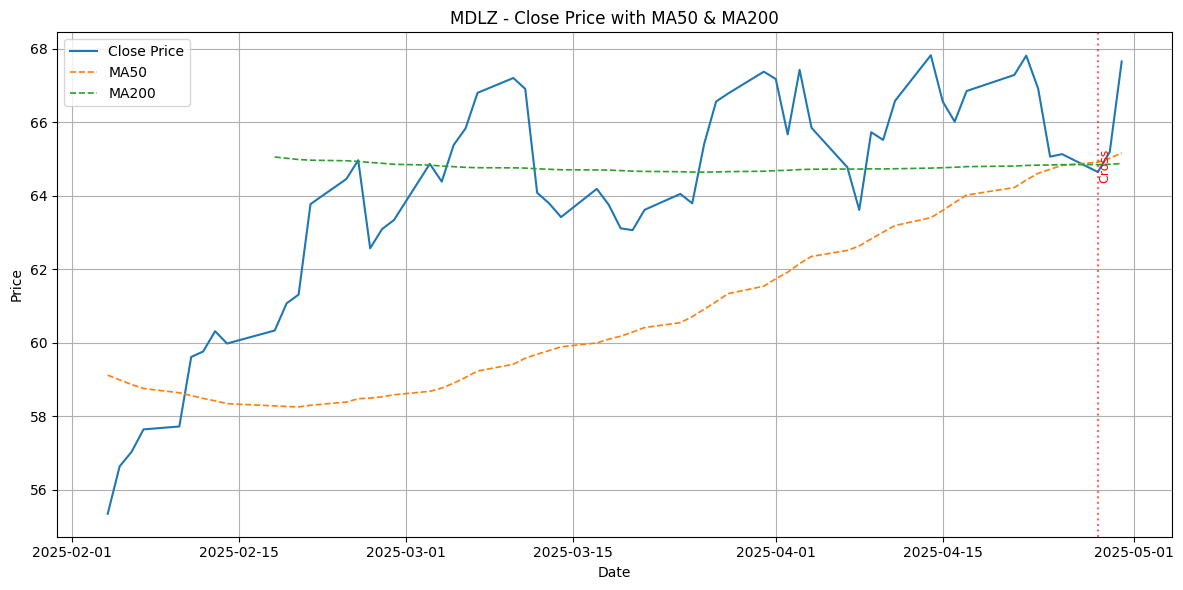


--- MOH ---


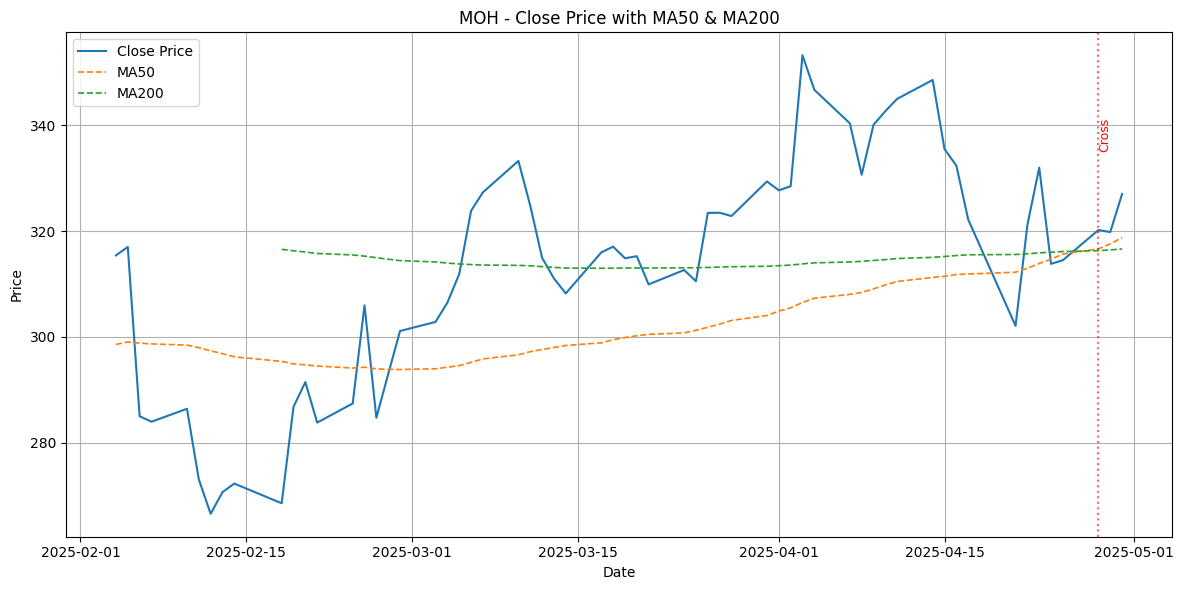


--- NEM ---


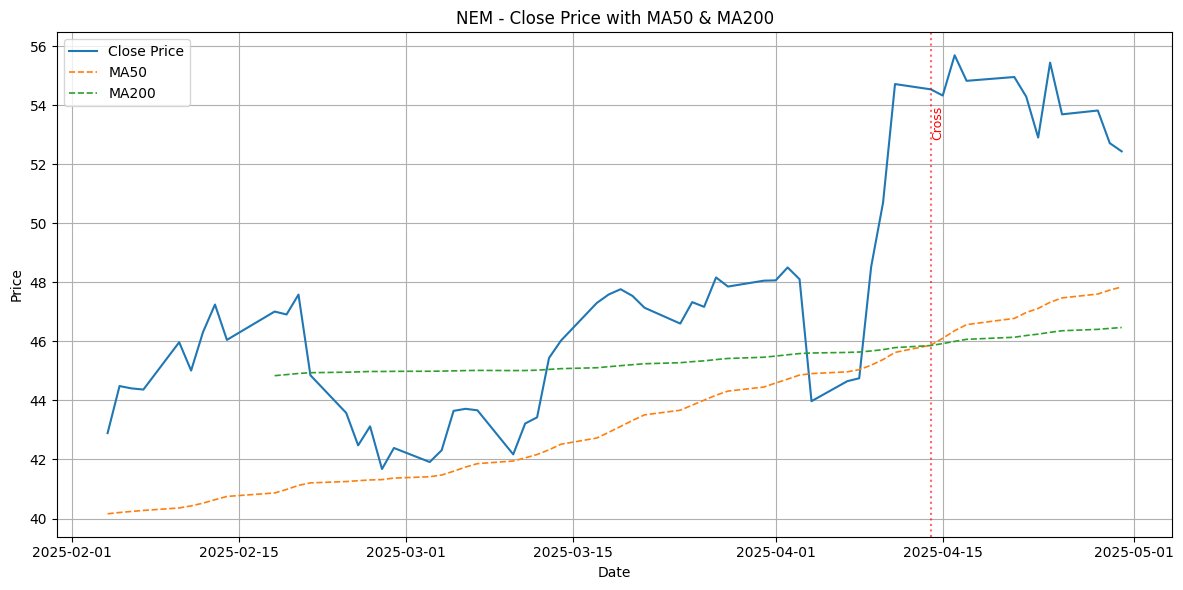


--- SBAC ---


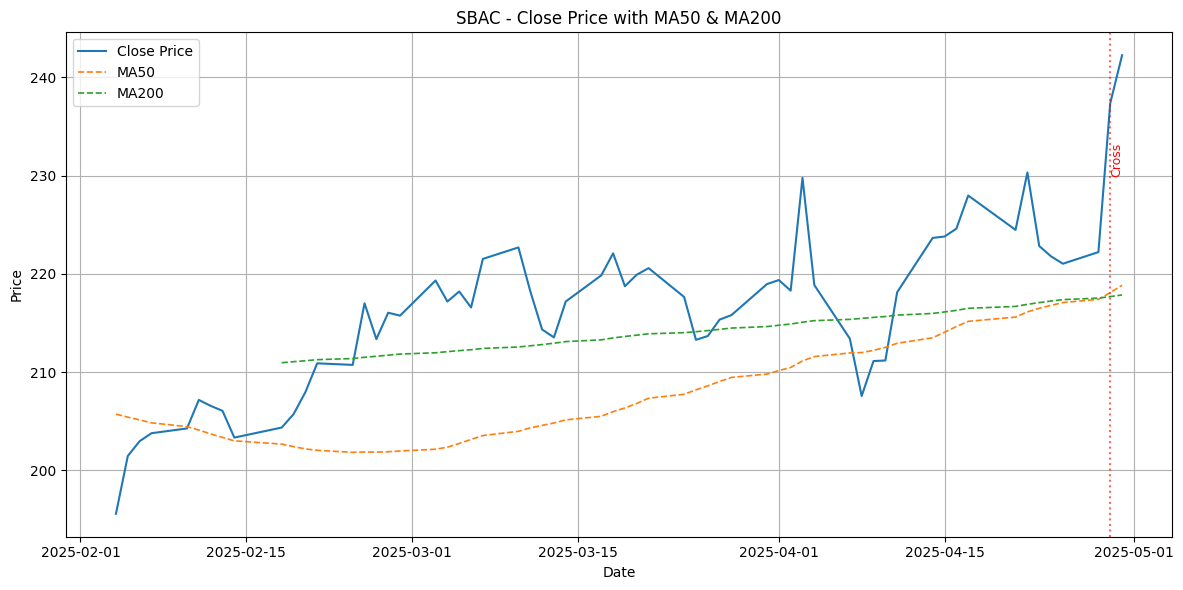


--- SJM ---


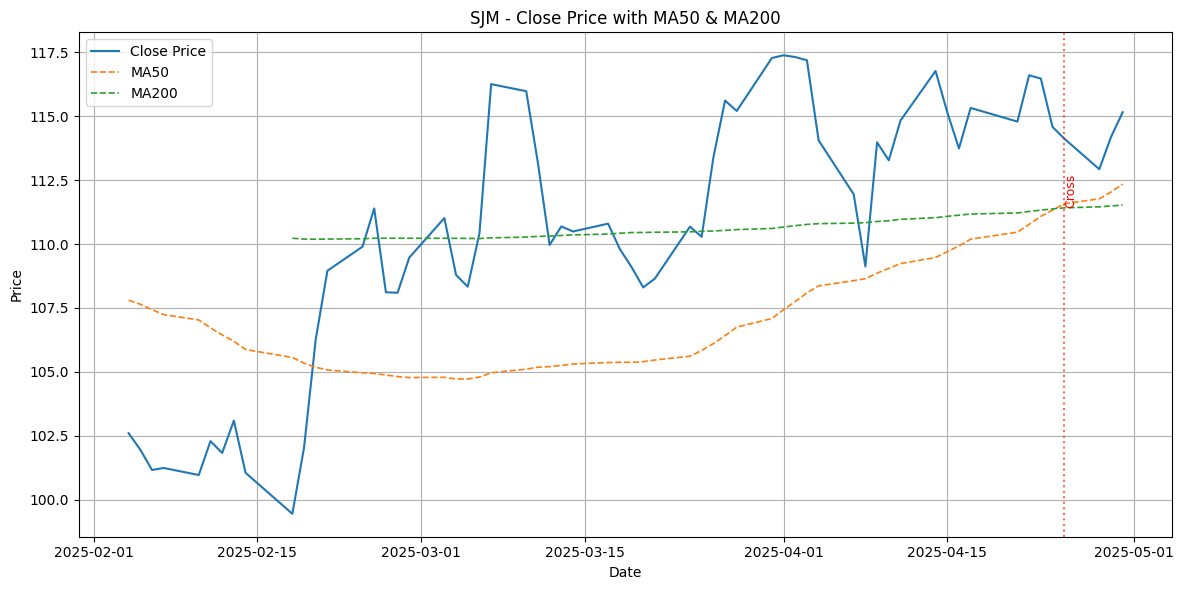

In [18]:
visualize_multiple_crosses(df_close, df_ma50, df_ma200, df_golden_cross_14d, "Golden Cross", top_n=10)

📉 Death Cross Visualizations

--- ACN ---


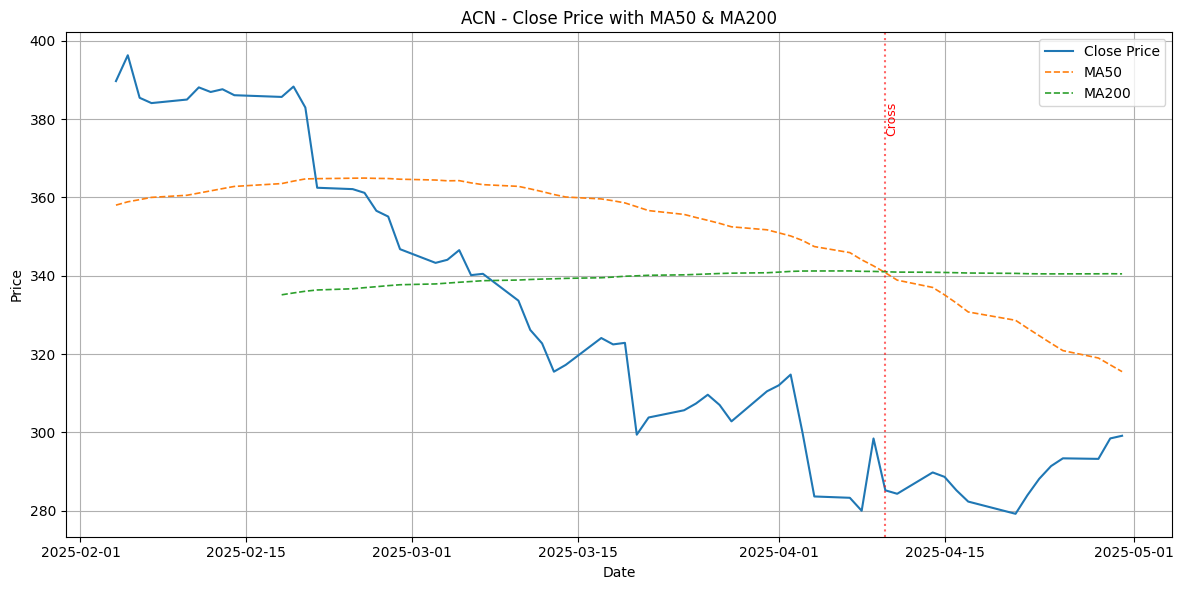


--- ADSK ---


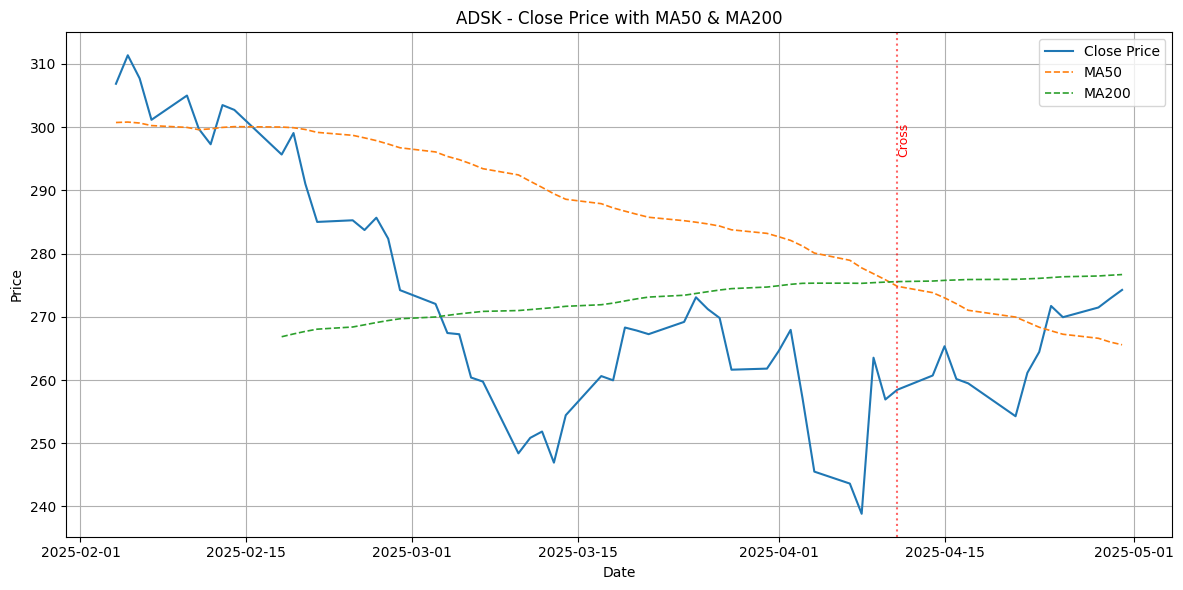


--- AME ---


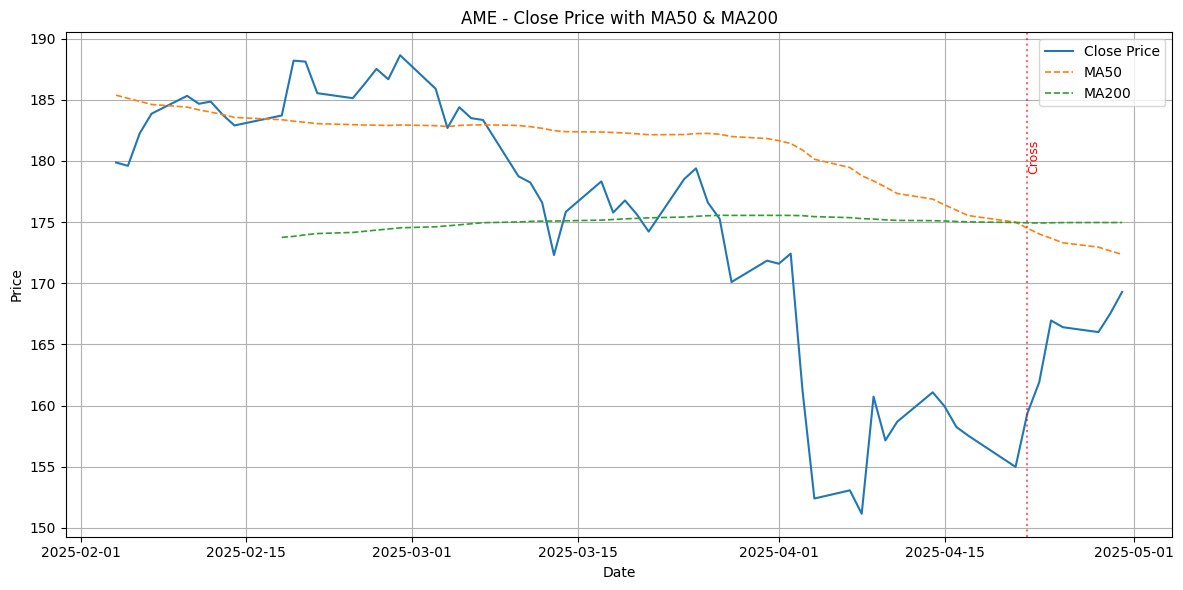


--- AMP ---


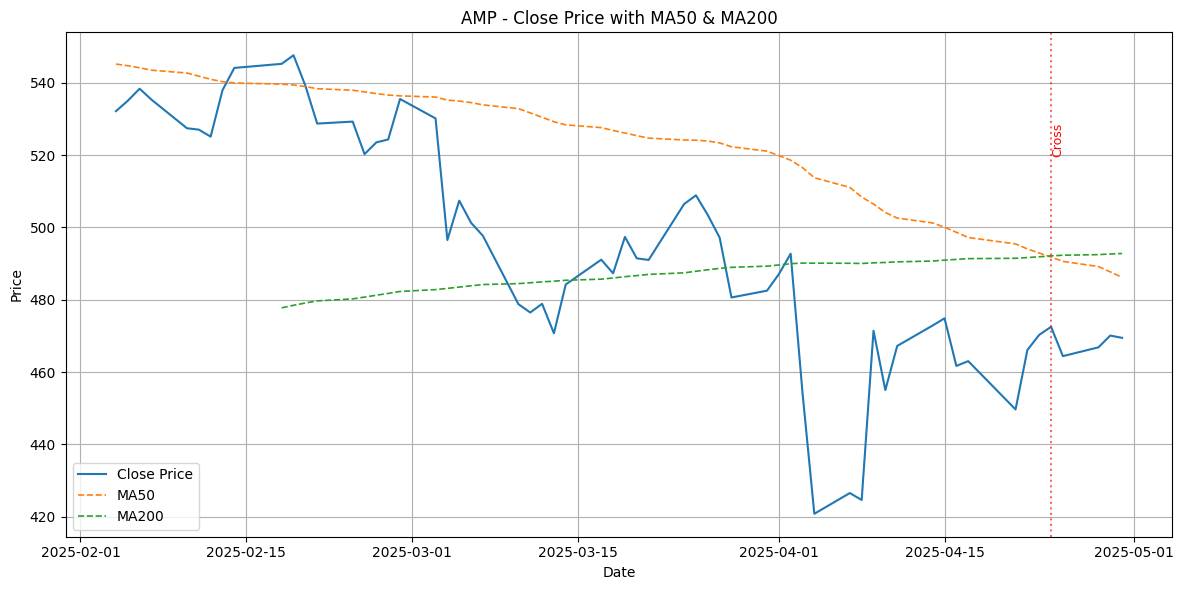


--- AMZN ---


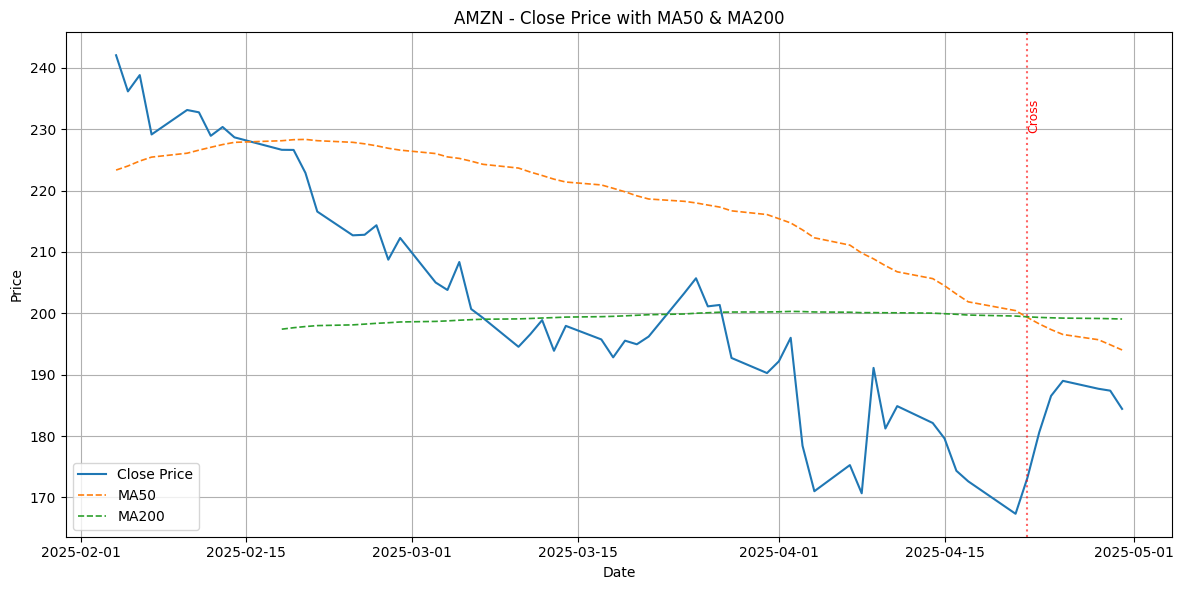


--- APD ---


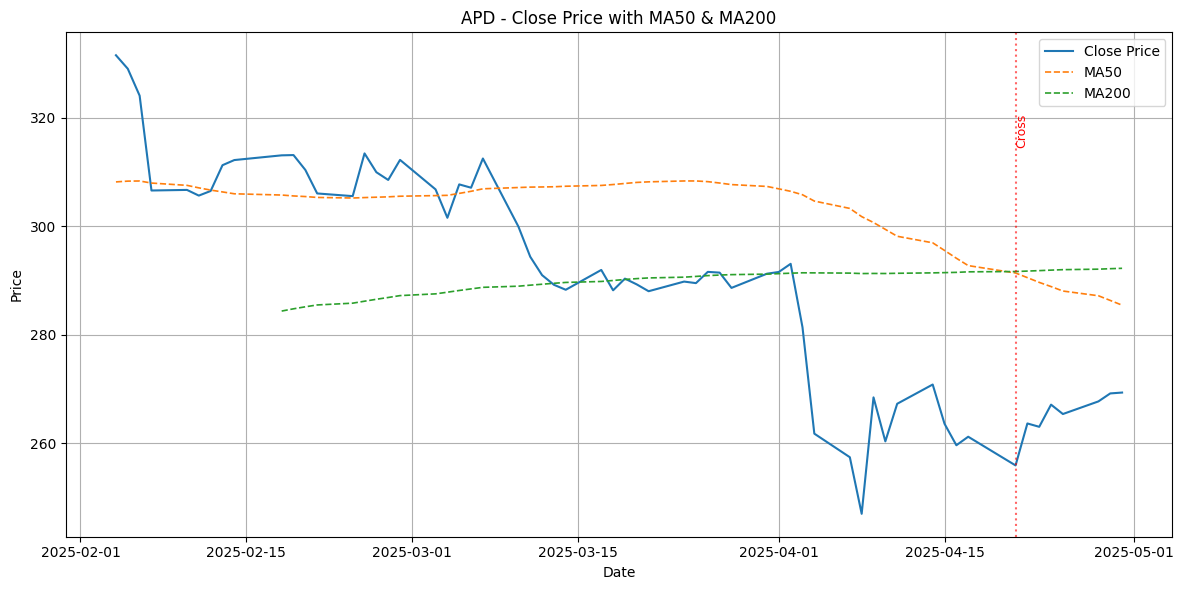


--- APO ---


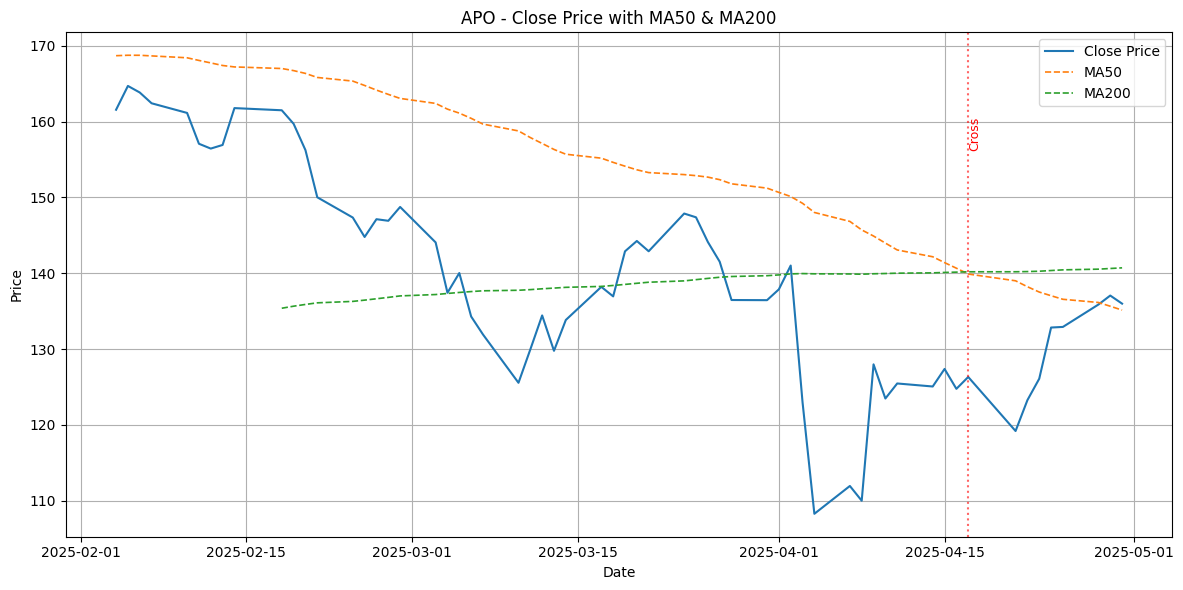


--- AXP ---


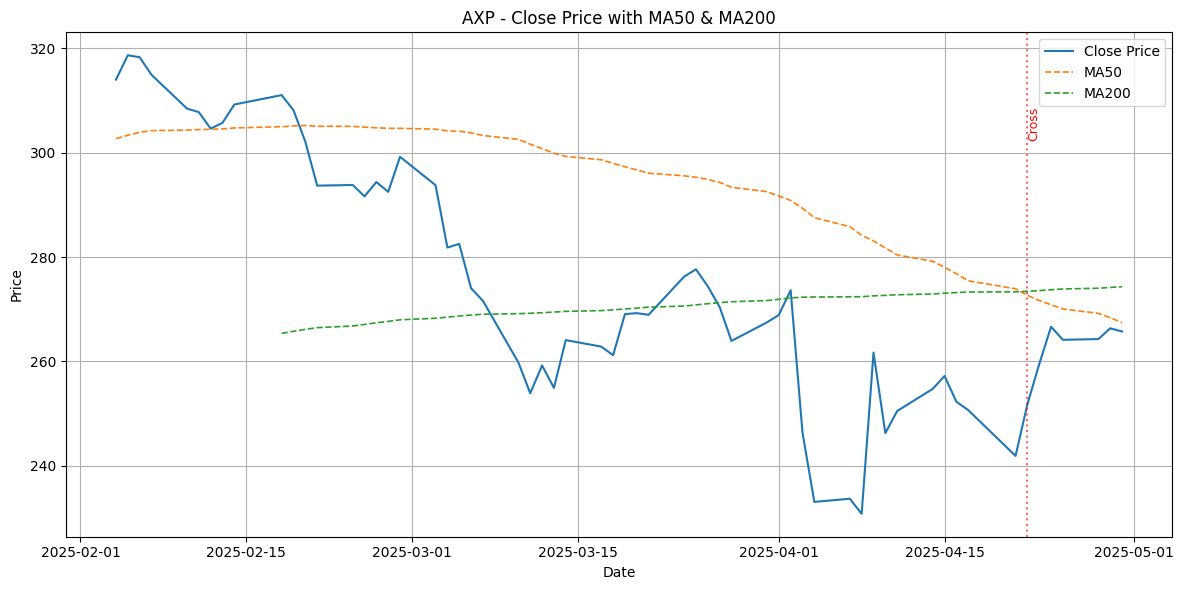


--- BAC ---


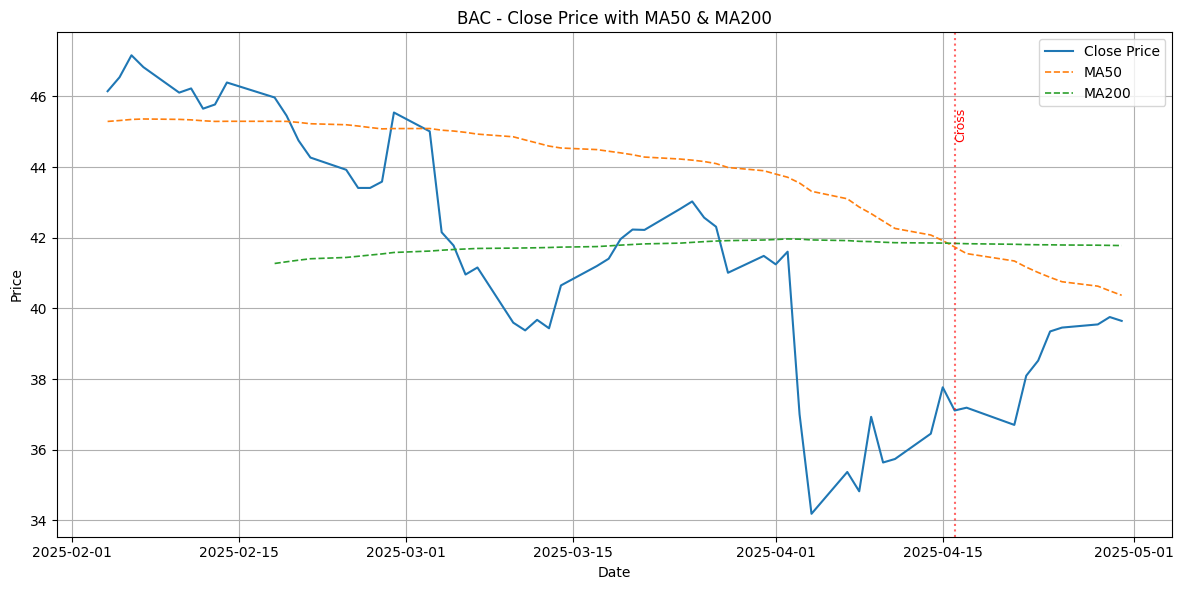


--- BLK ---


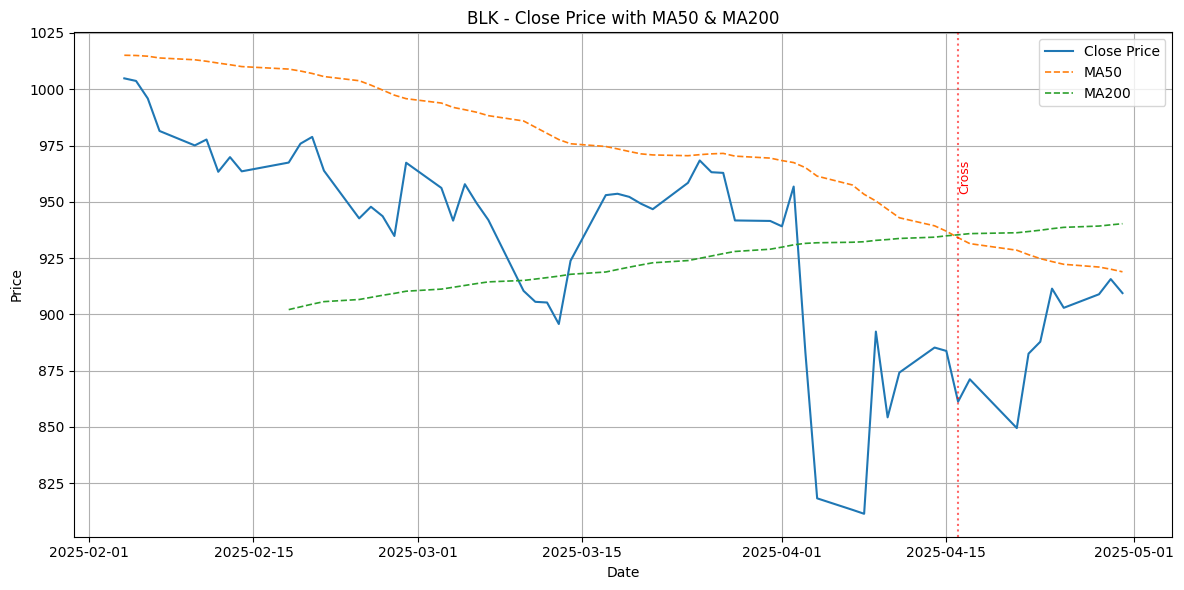

In [19]:
visualize_multiple_crosses(df_close, df_ma50, df_ma200, df_death_cross_14d, "Death Cross", top_n=10)

#### Compute the volatility of every stock and print it in the title of each plot 

In [20]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500 

# Compute daily returns
df_returns = df_close.pct_change(fill_method=None)

# Compute annualized volatility (252 trading days)
volatility_annualized = df_returns.std() * np.sqrt(252)  # Series: index=ticker, value=volatility
display(volatility_annualized.sort_values(ascending=False).head())

SMCI    1.133066
COIN    0.837647
VST     0.754744
PLTR    0.724473
TSLA    0.722116
dtype: float64

In [21]:
def plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility_series, cross_dates, cross_type):
    """
    Plot stock price and MAs highlighting crosses with volatility in the title.

    Args:
        ticker (str): Stock symbol to plot.
        df_close (pd.DataFrame): Close prices.
        df_ma50 (pd.DataFrame): 50-day moving average.
        df_ma200 (pd.DataFrame): 200-day moving average.
        volatility_series (pd.Series): Annualized volatility for the ticker.
        cross_dates (list of str): Dates (YYYY-MM-DD) where crosses occurred for this ticker.
        cross_type (str): "Golden Cross" or "Death Cross".
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df_close[ticker], label="Close", alpha=0.7)
    plt.plot(df_ma50[ticker], label="MA50", linestyle='--')
    plt.plot(df_ma200[ticker], label="MA200", linestyle='-.')

    # Highlight cross dates
    for date in cross_dates:
        plt.axvline(pd.to_datetime(date), color='green' if cross_type == "Golden Cross" else 'red', linestyle=':', alpha=0.7)

    vol = volatility_series.get(ticker, np.nan)
    vol_str = f"{vol:.2%}" if not np.isnan(vol) else "N/A"
    
    plt.title(f"{ticker} — {cross_type} — Volatility (Annualized): {vol_str}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

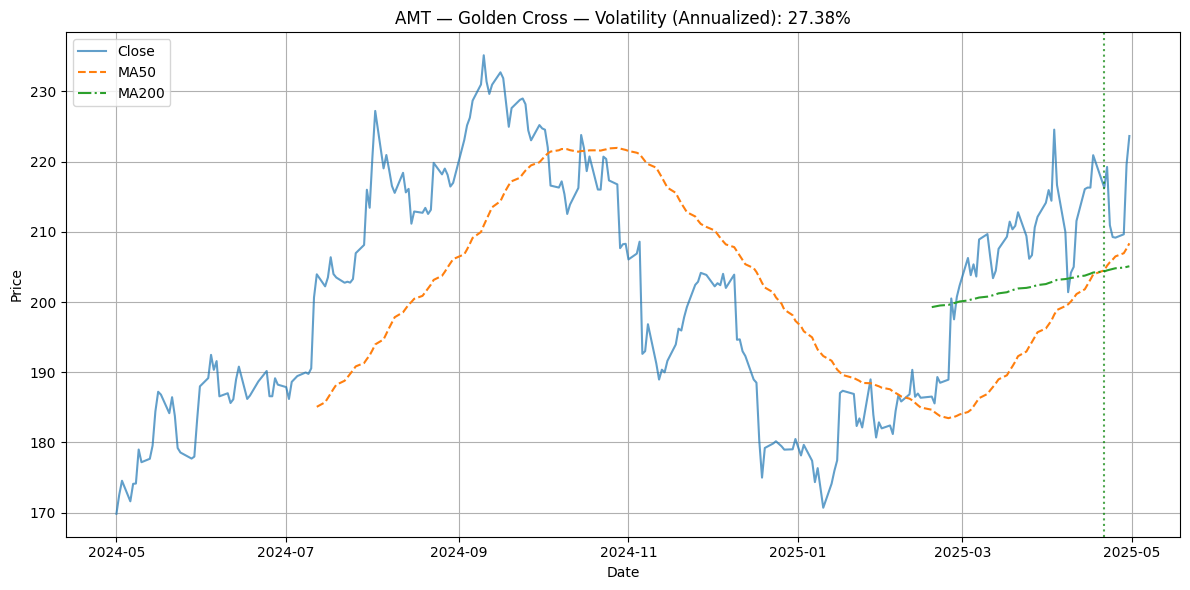

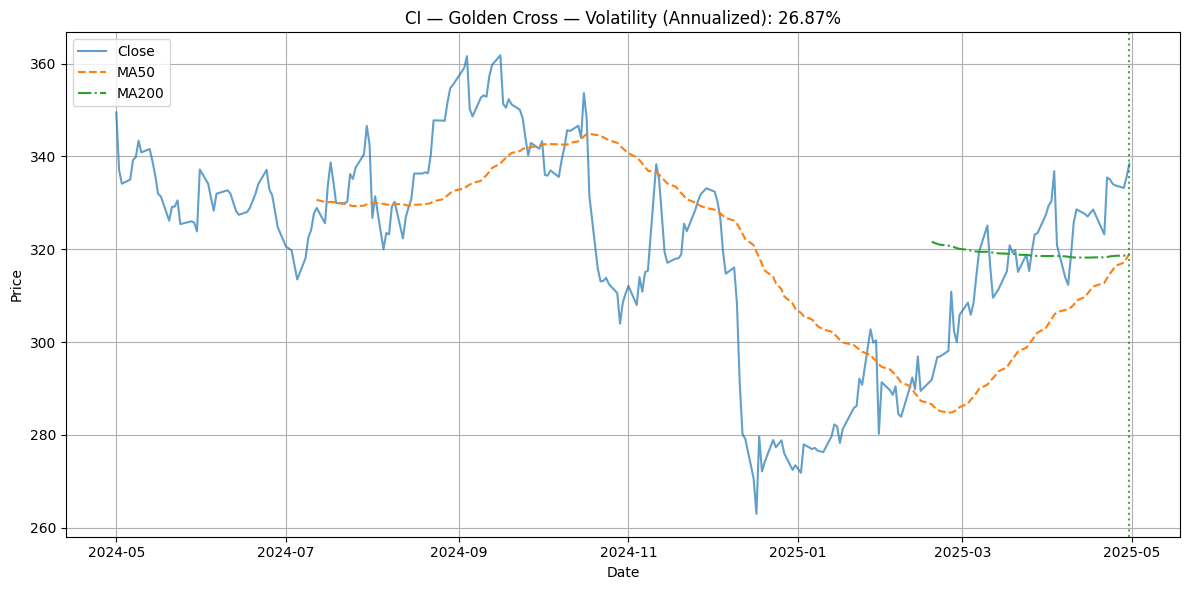

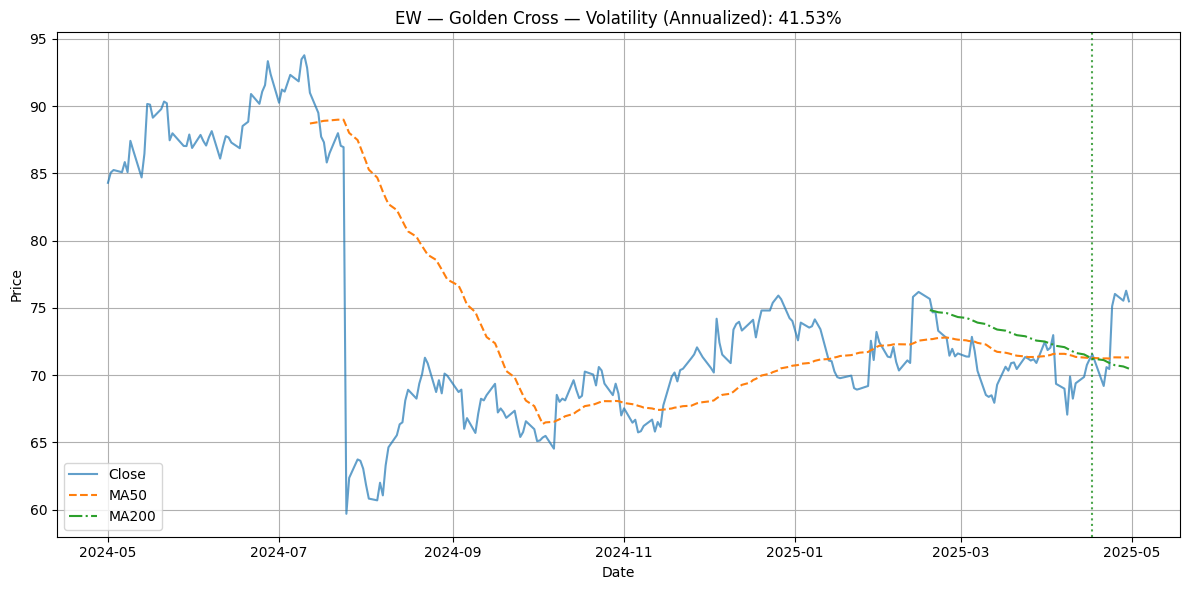

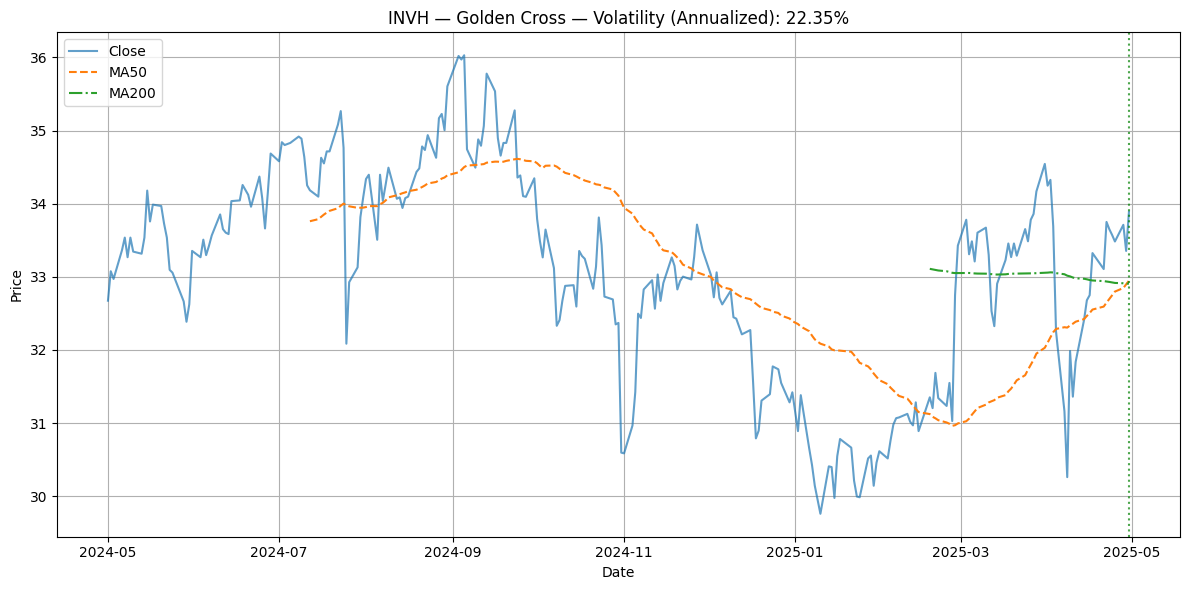

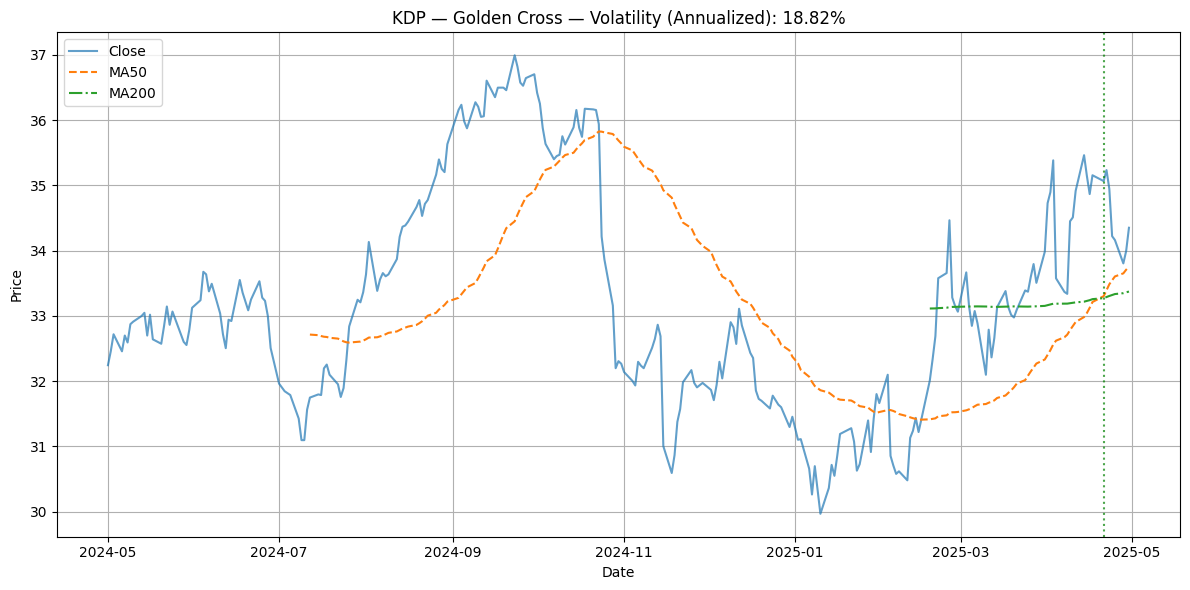

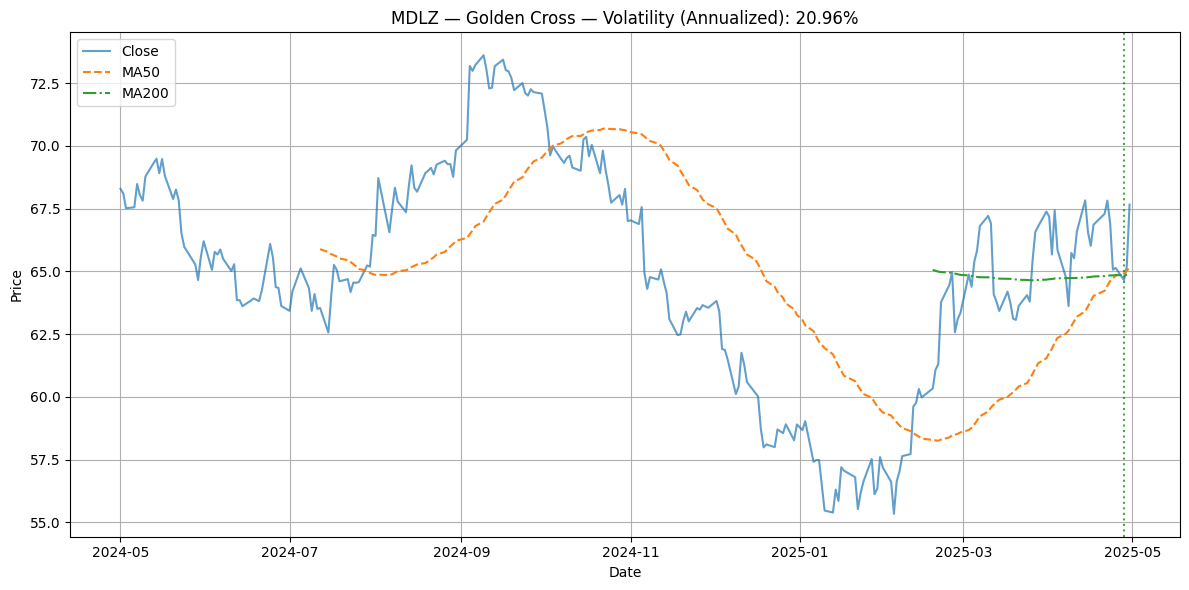

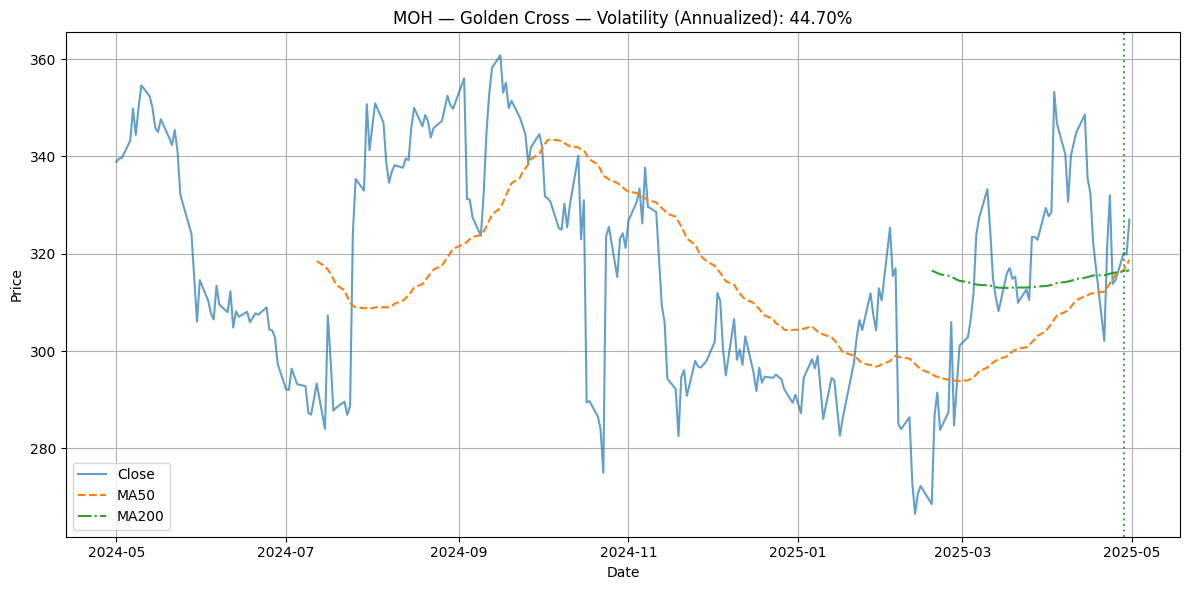

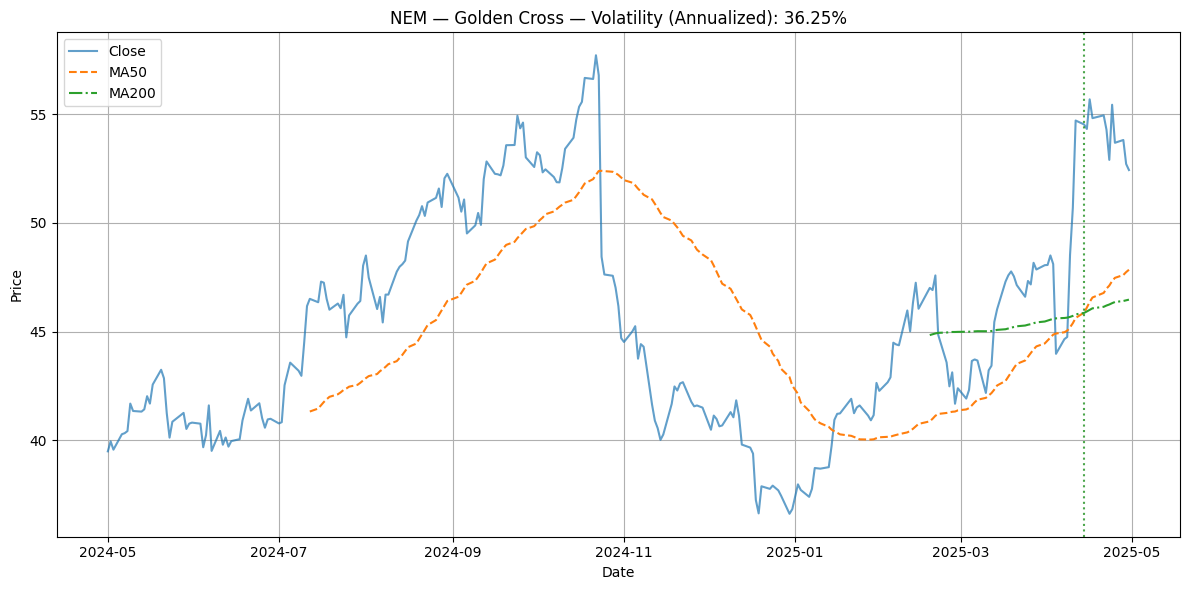

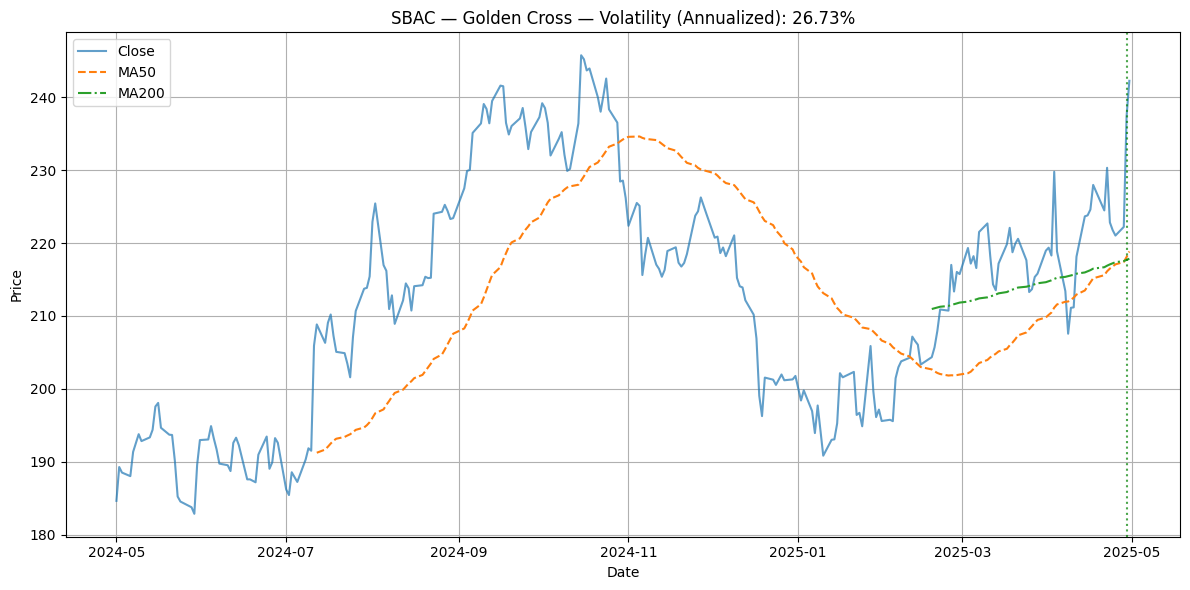

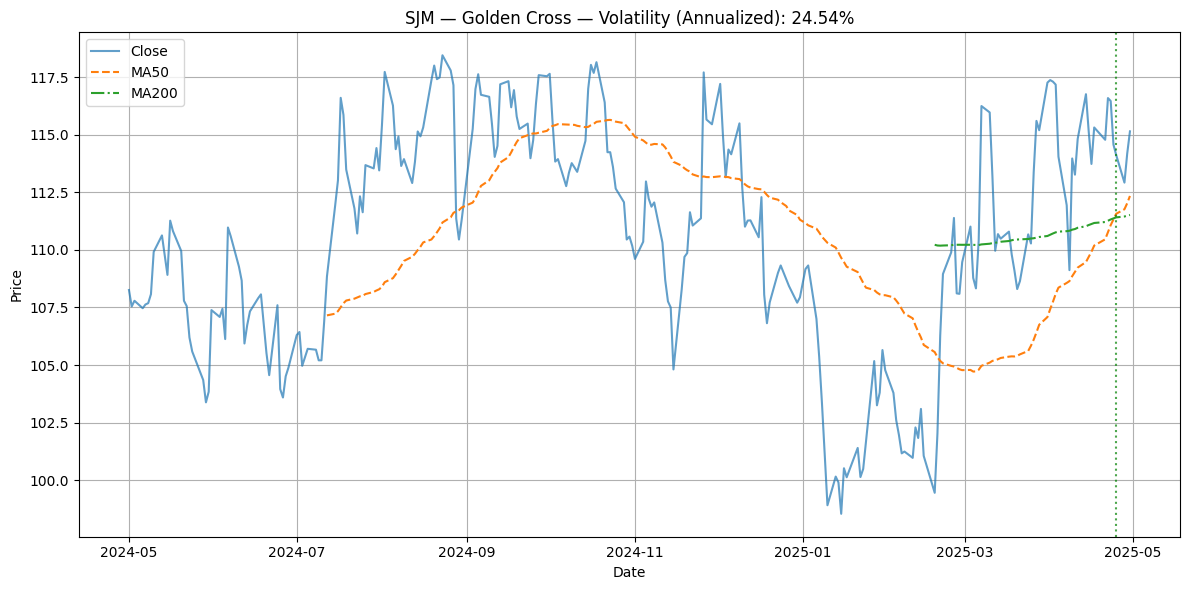

In [22]:
# CODE HERE
# Visualize the results here

# Sort the tickers by volatility and select the top 10
golden_tickers_top10 = sorted(df_golden_cross_14d["TICKER"].unique())[:10]

for ticker in golden_tickers_top10:
    dates = df_golden_cross_14d[df_golden_cross_14d["TICKER"] == ticker]["DATE"].tolist()
    plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility_annualized, dates, cross_type="Golden Cross")

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

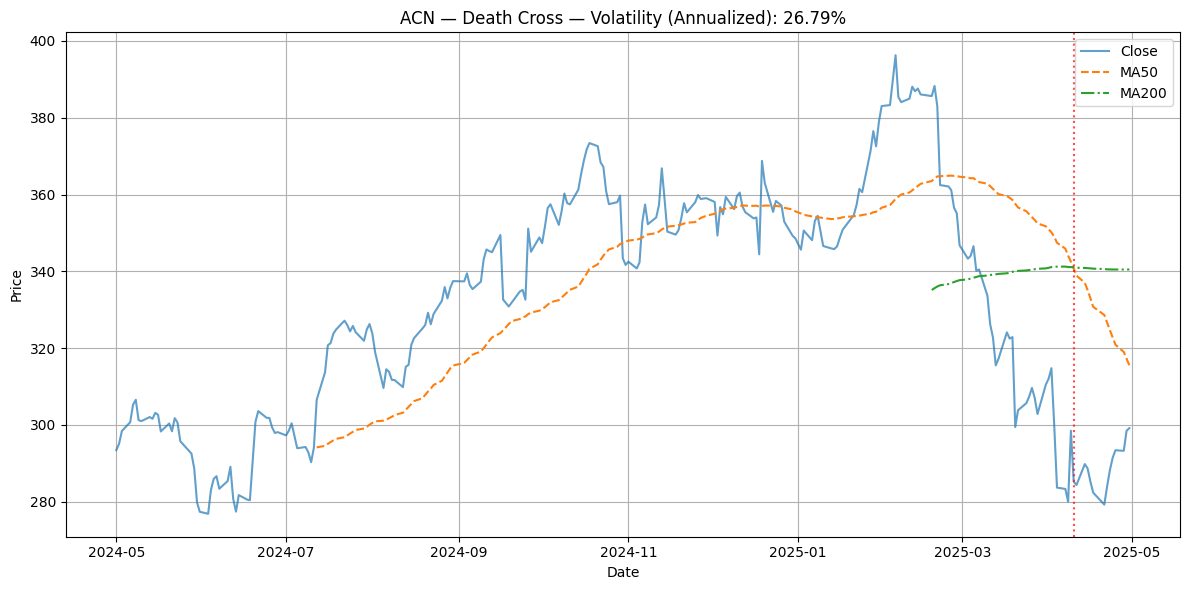

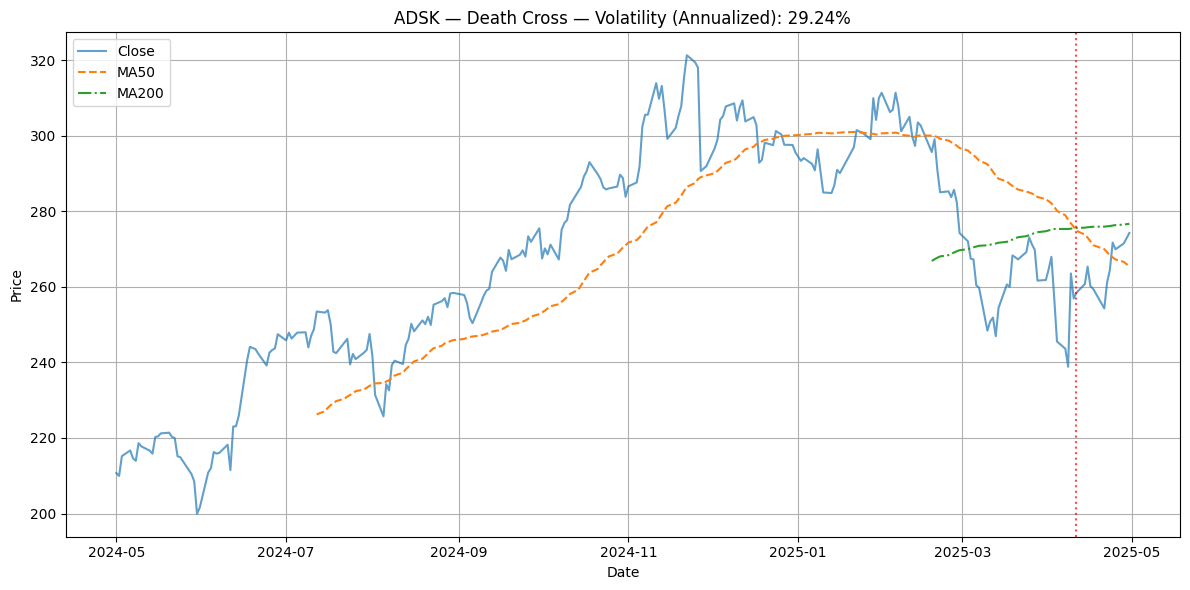

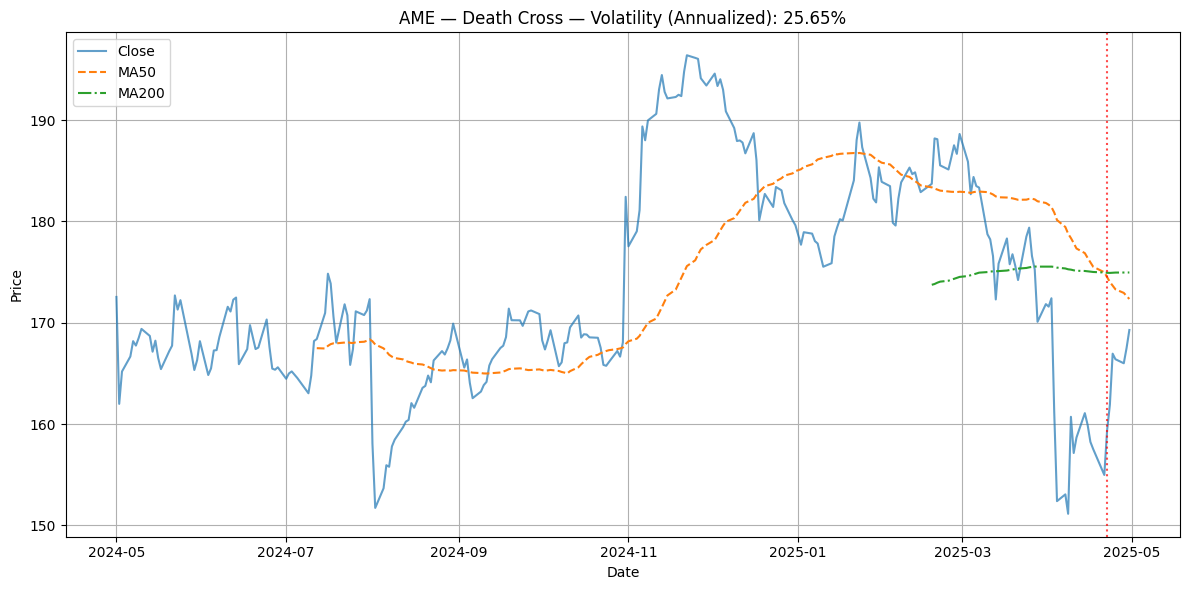

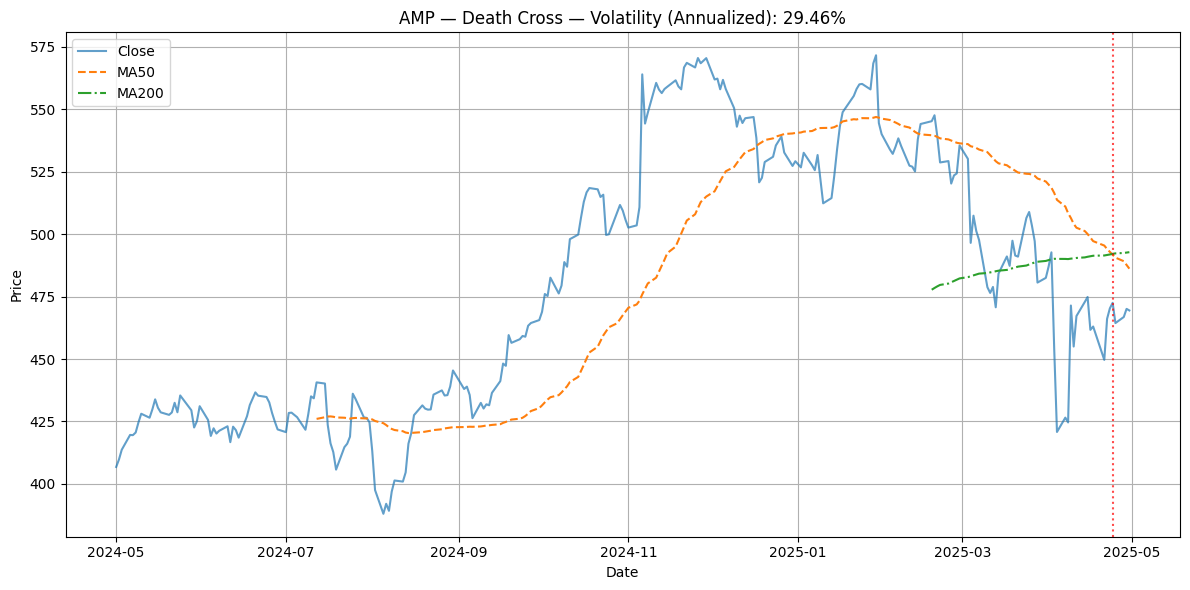

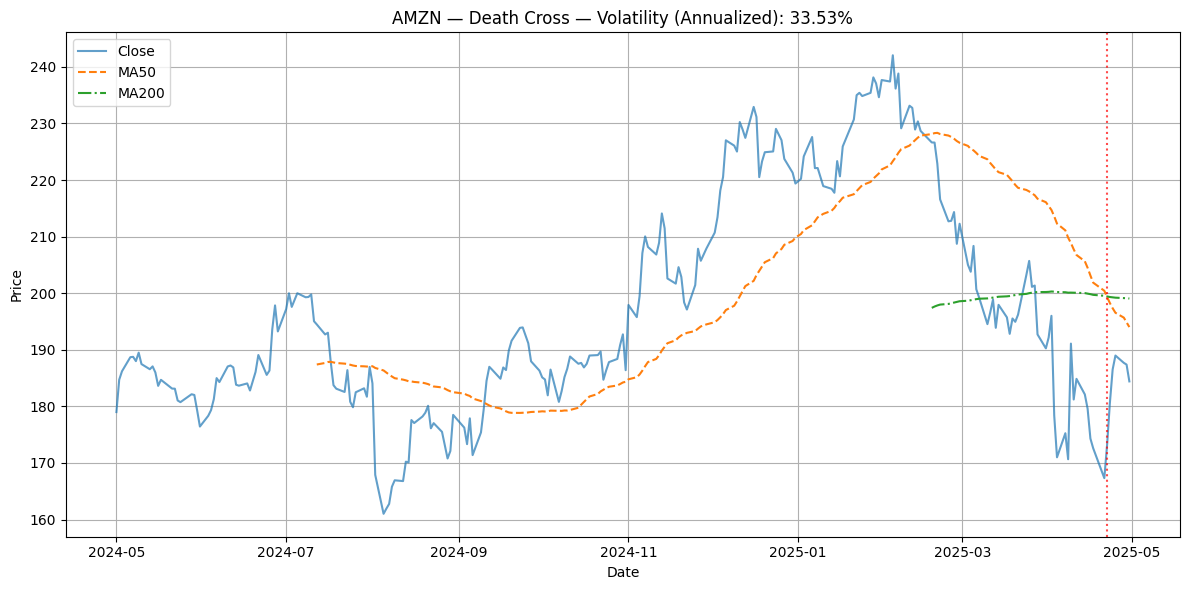

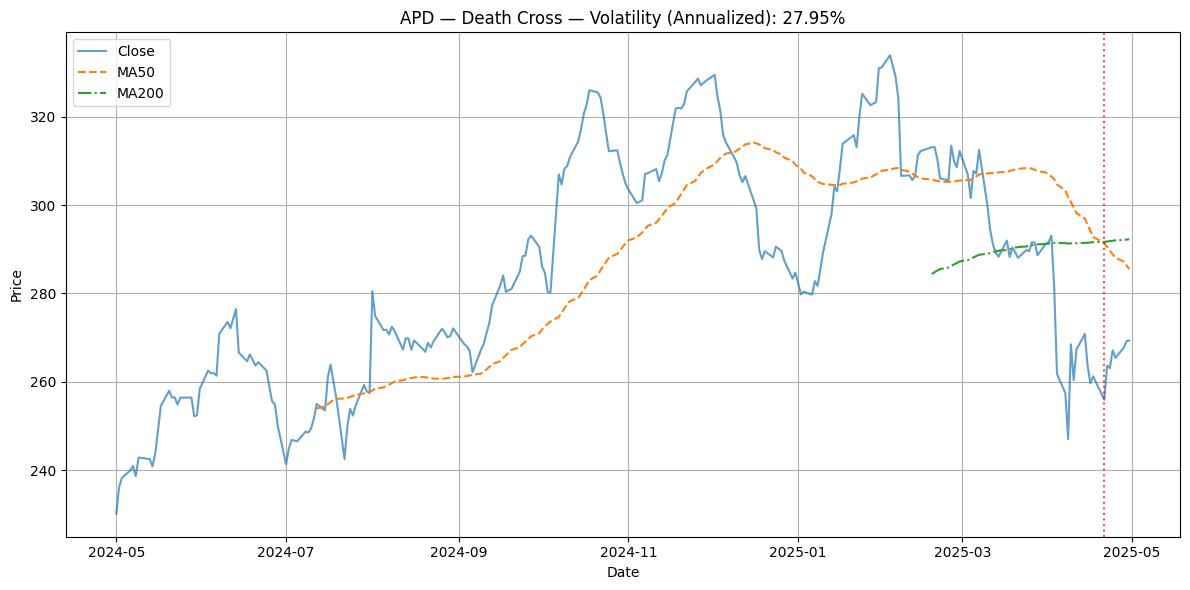

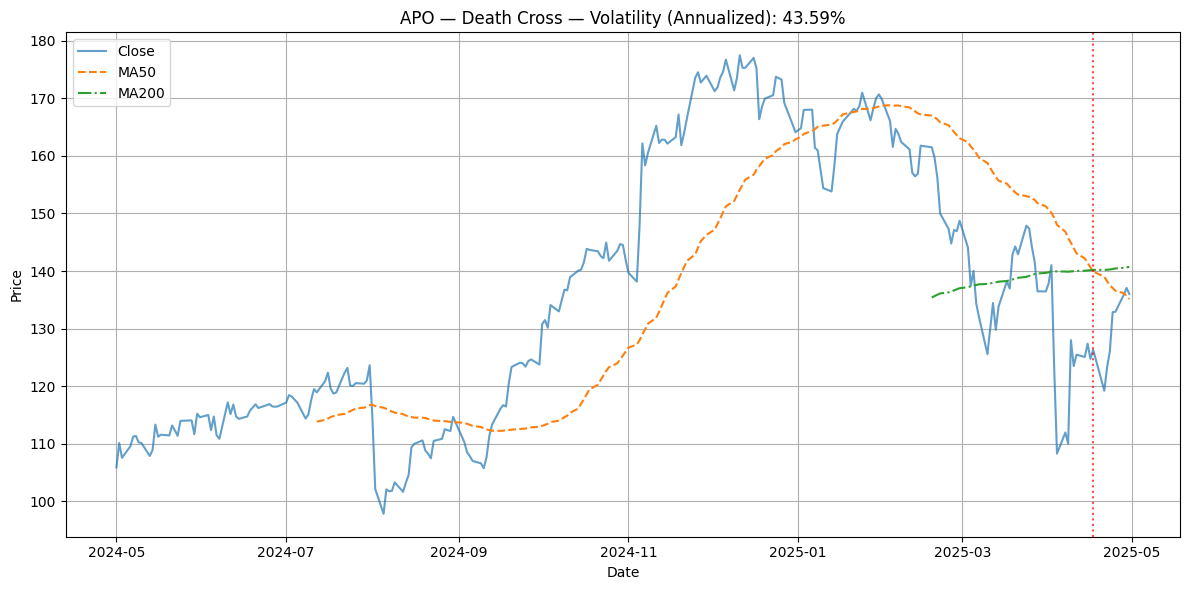

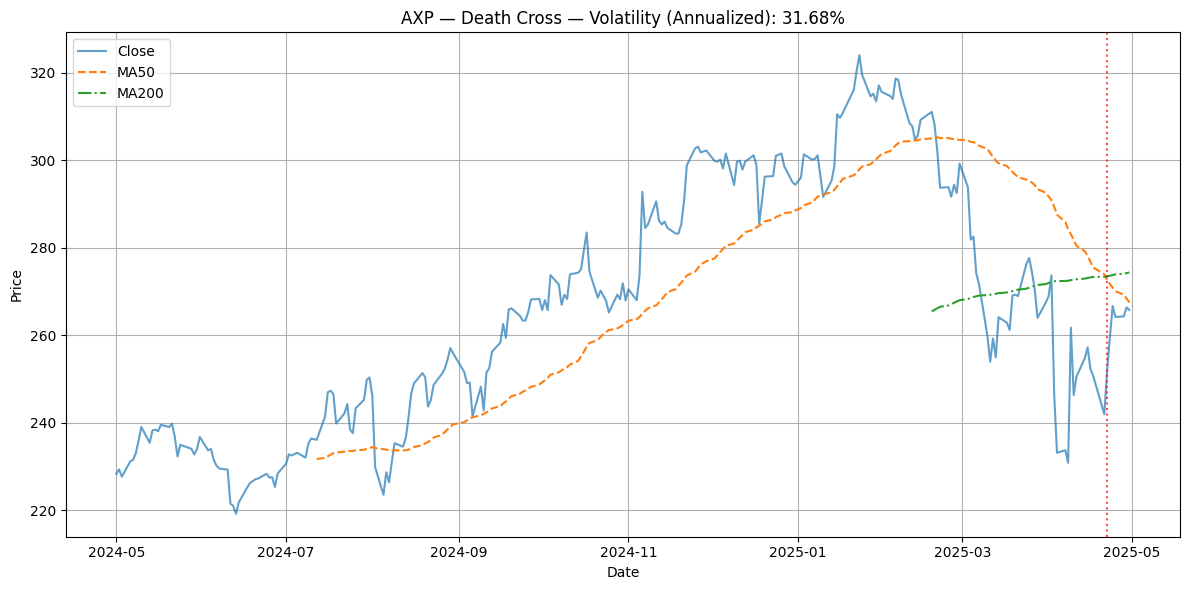

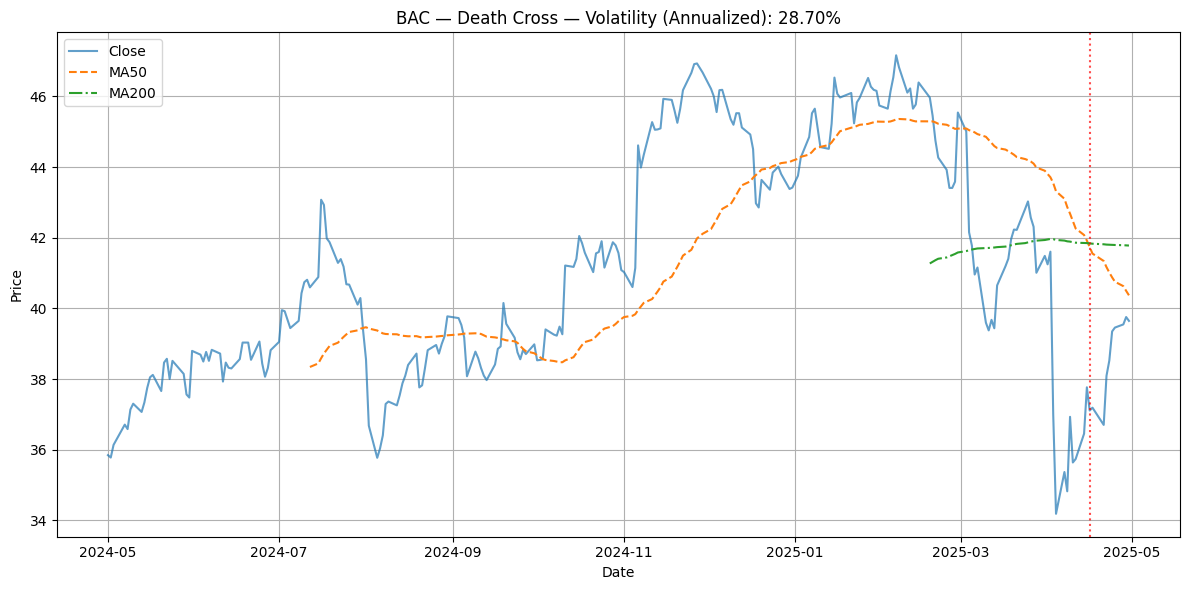

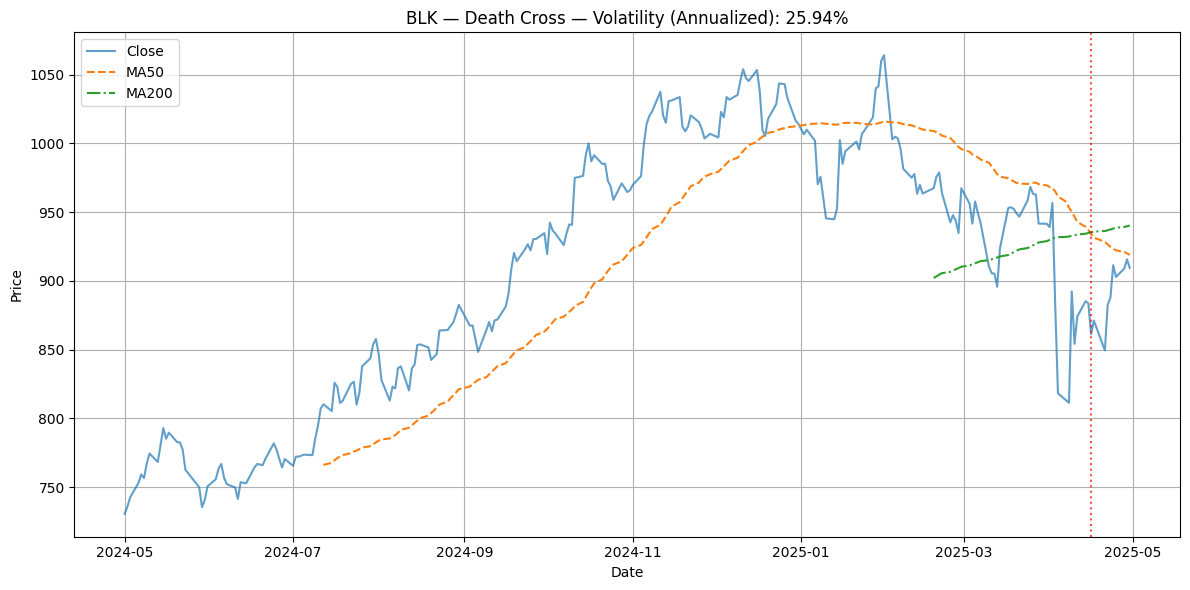

In [23]:
# CODE HERE
# Visualize the results here

# Sort the tickers by volatility and select the top 10
death_tickers_top10 = sorted(df_death_cross_14d["TICKER"].unique())[:10]

for ticker in death_tickers_top10:
    dates = df_death_cross_14d[df_death_cross_14d["TICKER"] == ticker]["DATE"].tolist()
    plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility_annualized, dates, cross_type="Death Cross")

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?

**RESPONSE**:

A Golden Cross is a widely recognized technical analysis pattern that occurs when a stock’s short-term moving average (commonly the 50-day moving average) crosses above its long-term moving average (typically the 200-day moving average). This event is generally interpreted as a bullish signal, suggesting a potential shift from a downward or neutral trend into a sustained upward trajectory.

From a technical standpoint, the Golden Cross represents a momentum-based confirmation that recent price strength is sufficient to outweigh longer-term price trends. It is often viewed by investors and analysts as a signal of trend reversal, marking the end of a bearish phase and the beginning of a possible long-term uptrend.

In practical terms, the implications of a Golden Cross include:

* *Market Sentiment Shift*: It reflects increasing investor optimism and potential capital inflows into the asset.

* *Entry Point Indicator*: Technical traders may use the Golden Cross as a timing signal to enter long positions or to validate bullish outlooks.

* *Self-Fulfilling Dynamics*: Because of its popularity, the pattern can sometimes generate momentum through increased buying triggered by the signal itself.

However, it is important to note that the Golden Cross is a lagging indicator, meaning it responds to historical price movements rather than predicting future ones. As such, while it can be a useful signal within trend-following strategies, it should ideally be complemented with other indicators (such as volume analysis, momentum indicators, or fundamental data) to improve reliability and reduce the risk of false positives.

> REFERENCES:

* https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp
* https://www.investopedia.com/terms/g/goldencross.asp

#### What is a Death Cross and how might market participants react to it?

**RESPONSE**:

A Death Cross is a bearish technical analysis pattern that occurs when a stock’s short-term moving average (typically the 50-day moving average) crosses below its long-term moving average (most commonly the 200-day moving average). This crossover is widely interpreted by market participants as a negative momentum signal, indicating that the asset may be entering a prolonged downtrend.

From a technical perspective, the Death Cross reflects deteriorating price performance in the short term that outweighs longer-term trends. It suggests that selling pressure may be intensifying and that investor sentiment is shifting from optimism to caution or pessimism.

Typical market reactions to a Death Cross include:

* *Increased Selling Activity*: Traders and institutional investors may reduce exposure or initiate short positions in anticipation of continued downward movement.

* *Cautious Investor Behavior*: Long-term investors may adopt more defensive positions, especially in volatile or uncertain market conditions.

* *Signal Amplification*: Because of its popularity in trading strategies, the pattern can trigger automated responses (e.g., stop-loss orders or algorithmic selling), reinforcing downward momentum.

While the Death Cross has historically preceded bear markets in some high-profile cases (e.g., during the 2008 financial crisis), it is important to recognize that, like the Golden Cross, it is a lagging indicator. It often confirms trends after significant price movement has already occurred, which may result in false signals or late entries. Additionally, in volatile or range-bound markets, the pattern may occur more frequently and lose predictive value.

In practice, sophisticated investors often contextualize the Death Cross within broader macroeconomic, fundamental, or sentiment indicators to avoid overreacting to technical noise.

> REFERENCES

* https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp
* https://www.investopedia.com/terms/d/deathcross.asp
* https://thetradinganalyst.com/death-cross/
* https://www.ebc.com/forex/what-is-a-death-cross-how-to-identify-and-trade

#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

**RESPONSE**:

Moving averages, particularly the 50-day (MA50) and 200-day (MA200) simple moving averages, are widely employed in technical analysis as tools for identifying market trends, smoothing price volatility, and generating actionable trading signals.

These indicators offer several key advantages that explain their popularity among analysts and market participants:

* *Trend Identification*:
    * MA50 is typically used to reflect short- to medium-term trends, while MA200 captures long-term price behavior.
    * Their slope and direction help determine whether a stock is in an uptrend or downtrend, filtering out day-to-day noise.

* *Momentum and Confirmation Signals*:
    * Crossovers between MA50 and MA200 (e.g., Golden Cross and Death Cross) act as momentum-based confirmation signals, indicating shifts in market sentiment.
    * Investors may use these crossovers to validate or time their entry and exit points.

* *Support and Resistance Zones*:
    * Moving averages often function as dynamic support or resistance levels, particularly in trending markets.
    * Traders may anticipate price reactions around these averages and adjust strategies accordingly.

* *Simplicity and Broad Adoption*:
    * MA50 and MA200 are easy to compute and interpret, making them accessible and widely followed across different types of investors.
    * Their ubiquity can lead to self-fulfilling behavior, as many traders act simultaneously when these levels are breached or crossed.

* *Risk Management and Smoothing*:
    * By averaging prices, MAs reduce short-term volatility, enabling better risk assessment and improved visualization of price structure.
    * They are particularly useful in developing trend-following strategies and systematic portfolio rules.

Despite their strengths, moving averages are lagging indicators; they respond to past data and may be less effective during sideways or highly volatile market regimes. Therefore, seasoned practitioners often combine them with volume analysis, oscillators, or macroeconomic signals to strengthen decision-making frameworks.

> REFERENCES

* https://www.investopedia.com/terms/m/movingaverage.asp
* https://ftmo.com/en/technical-analysis-why-are-moving-averages-so-popular/
* https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

**RESPONSE**:

The choice to examine the last 14 trading days when detecting Golden and Death Crosses is rooted in a balance between recency and significance. This time window allows analysts and investors to focus on timely signals while reducing noise from transient fluctuations:

* *Recency of Signal Detection*: In financial markets, timing is critical. A cross that occurred several months ago may no longer hold predictive power. By restricting the search to the last 14 days, the analysis emphasizes recent technical shifts that are more likely to influence current investment decisions.

* *Reduced Risk of False Positives*: Shorter windows (e.g., 1–3 days) may capture temporary crossovers due to volatility rather than structural shifts. A 14-day range offers greater confidence that detected crosses are not anomalies, especially when coupled with consistent price action.

* *Practical Monitoring Horizon*: From a portfolio management perspective, the 14-day window corresponds well to weekly or biweekly reviews commonly performed by institutional and retail traders. It allows for detection of emerging trends without requiring daily signal scanning.

* *Rubric Alignment*: In structured assignments or automated systems, setting a specific time frame (like 14 days) ensures consistency in evaluation and replicability of results.

Some implications of this choice are:

* *Higher Propensity for False Signals (Whipsaws)*: While the Golden and Death Crosses are considered significant, a very short observation window for their occurrence might lead to identifying crosses that are not sustained. The market can experience "whipsaws" where the MAs cross, only to reverse course quickly. A 14-day window might catch these short-lived crossovers more readily, which could result in premature entries or exits.

* *Risk of "Missing" Broader Confirmation*: If a cross occurred just outside the 14-day window (e.g., 15 days ago), it would be excluded from the identified list, even if it might still be a valid and developing trend. This choice implicitly assumes that only very recent confirmations are of interest.

* Requires Complementary Analysis: Due to the inherent lag and the potential for false signals, relying solely on a 14-day detection window for Golden/Death Crosses without further validation could lead to suboptimal trading decisions. The choice of a short observation window emphasizes the need for careful risk management and a multi-indicator approach.

> REFERENCES

* https://tradezero.com/blog/golden-cross-vs-death-cross
* https://www.xs.com/en/blog/golden-cross-vs-death-cross/#:~:text=Golden%20Cross:%20A%20long%2Dterm,signaling%20caution%20or%20short%20positions.
* https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

**RESPONSE**:

Financial markets are inherently complex and dynamic, characterized by fluctuating price movements. While trend-following indicators like Moving Averages (MAs) identify the direction of price over time, volatility (often measured as the standard deviation of an asset's percentage price changes) provides crucial context by quantifying the magnitude and dispersion of these movements. Understanding volatility around Golden (bullish) and Death (bearish) Crosses helps market participants assess the reliability of the signal, manage risk, and tailor their trading strategies.

Here's how volatility contextualizes price movement around MA crosses:

* *Assessing Signal Reliability and Conviction*:
    * Low Volatility: When a Golden or Death Cross occurs in a low-volatility environment, it often suggests a more reliable and sustained trend. The price movements are smoother, and the crossover is less likely to be a "whipsaw" or a false signal caused by transient noise. Low volatility implies greater conviction in the emerging trend, as prices are consolidating before a potentially directional move.
    * High Volatility: Conversely, a cross occurring during periods of high volatility indicates increased uncertainty and rapid price swings. In such conditions, the reliability of the cross signal can be diminished. High volatility increases the probability of false breakouts or reversals (whipsaws), as prices can fluctuate wildly around the moving averages, leading to frequent and unreliable crossovers. Investors might view these signals with more skepticism, as the underlying trend may not be as stable.

* *Risk Management and Position Sizing*:
    * Volatile assets naturally carry higher risk due to their larger potential price swings. When a cross occurs, contextualizing it with volatility helps in determining appropriate position sizing and setting realistic stop-loss and take-profit levels.
    * In high-volatility environments, wider stop-loss orders may be necessary to avoid being prematurely stopped out by normal price fluctuations. Conversely, in low-volatility regimes, tighter stops might be feasible. Volatility, therefore, provides a quantitative measure for adapting risk parameters around a signal.

* *Market Sentiment and Psychological Context*:
    * High volatility around a cross often reflects heightened fear, uncertainty, or greed among market participants. This emotional backdrop can impact how quickly and decisively prices move after a cross. A cross in a calm (low volatility) market might be seen as a more rational and institutionally driven trend, whereas one in a volatile market could be more prone to speculative excesses.

> REFERENCES

* https://international.schwab.com/investing-education/how-traders-can-take-advantage-volatile-markets
* https://www.strike.money/technical-analysis/volatility-indicators
* https://fastercapital.com/content/Price-Volatility--How-to-Explain-and-Measure-the-Frequency-and-Magnitude-of-Price-Changes-in-Your-Market.html
* https://tradeciety.com/6-ways-to-place-stops-in-the-most-effective-way-pros-and-cons

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

**RESPONSE**:

To evaluate whether Golden Crosses translate into profitable trading opportunities, a systematic backtesting framework must be implemented. This involves simulating historical trades triggered by Golden Cross signals and quantifying their performance over time. The process includes the following steps:

1. *Define Clear Trading Rules*
    
    The first step is to establish precise and unambiguous rules for entering and exiting trades based on the Golden Cross signal.

    * Entry Rule: A long position is initiated when the 50-day Simple Moving Average (SMA) crosses above the 200-day SMA. The trade would typically be executed at the opening price of the next trading day following the confirmation of the cross to avoid look-ahead bias.

    * Exit Rule(s): This is critical and can vary based on the intended strategy:

        * Counter-Signal Exit: The most common approach for testing the Golden Cross's primary efficacy is to exit the long position when a Death Cross (50-day SMA crosses below 200-day SMA) occurs. This tests the complete cycle of the trend indicated by the MA crossover.

        * Fixed Profit Target and/or Stop-Loss: Trades could also be exited if the price reaches a predefined percentage profit (e.g., +15%) or a predefined percentage loss (e.g., -5%). This introduces risk management and profit-taking mechanisms.

        * Time-Based Exit: Exiting a position after a fixed number of trading days (e.g., 90 days) regardless of subsequent signals, to assess the profitability over a specific holding period.

2. *Select Relevant Data and Timeframe*
    
    * Data Quality: Use historical adjusted close prices for the chosen asset(s) to account for dividends, stock splits, and other corporate actions, ensuring accurate return calculations.

    * Sufficiency of History: A long enough historical period (e.g., 10-20 years or more) is crucial to capture multiple market cycles (bull, bear, and sideways markets) and ensure a statistically significant number of Golden Cross signals occur. This helps assess the strategy's robustness across varied market conditions.

    * Universe of Assets: The backtest can be performed on a single asset (e.g., a major index like the S&P 500) or a diversified portfolio of stocks. For a portfolio, rules for allocation and position sizing (e.g., equal weighting, fixed capital per trade) must be established.

3. *Simulate Trades and Calculate Returns*
    
    For each detected Golden Cross signal:

    * Record the entry date and price.

    * Track the subsequent price movement until an exit rule is triggered.

    * Record the exit date and price.

    * Calculate the raw return for that specific trade: 

        $$ \text{Raw Return} = \frac{\text{Exit Price} - \text{Entry Price}}{\text{Entry Price}} $$

4. *Evaluate Performance Metrics*
    
    Once all simulated trades are complete, a range of quantitative metrics should be calculated to assess profitability and risk:

    * Total Cumulative Return: The overall return generated by the strategy over the entire backtesting period.

    * Annualized Return (CAGR - Compound Annual Growth Rate): The average annual rate of return, allowing for comparison with other investment opportunities.

    * Win Rate (or Hit Ratio): The percentage of trades that generated a positive return.

    * Average Profit per Winning Trade: The average return of profitable trades.

    * Average Loss per Losing Trade: The average return of unprofitable trades.

    * Profit Factor: Calculated as (Gross Profit) / (Gross Loss). A value greater than 1 indicates a profitable strategy before costs.

    * Maximum Drawdown: The largest peak-to-trough decline in the portfolio's value, representing the maximum experienced risk.

    * Sharpe Ratio / Sortino Ratio: Risk-adjusted return metrics that compare the strategy's returns to its volatility (Sharpe) or downside volatility (Sortino), providing insight into the quality of returns relative to the risk taken.

    * Number of Trades: The total count of signals generated and trades executed.

    * Average Holding Period: The average duration for which positions were held.

5. *Account for Real-World Considerations (Limitations)*
    
    To ensure the backtest results are as realistic as possible and avoid "curve-fitting" or overly optimistic projections, several factors must be considered:

    * Transaction Costs: Brokerage commissions, exchange fees, and bid-ask spreads (slippage) significantly reduce net profitability. These must be modeled accurately.

    * Taxes: Capital gains taxes can impact net returns and should be considered for a complete picture of profitability.

    * Dividends: Ensure that adjusted close prices are used, or that dividends are explicitly added back into the return calculations.

    * Liquidity: For less liquid assets, it might not always be possible to execute trades at the exact calculated entry/exit prices, leading to slippage.

    * Look-ahead Bias: Ensure that no future data is used in making current trading decisions.

    * Survivorship Bias: If testing on a current index (like S&P 500), the historical data will only include companies that "survived" in the index, potentially overstating historical returns by excluding failed companies.

> REFERENCES

* https://www.investopedia.com/terms/b/backtesting.asp
* https://blog.quantinsti.com/backtesting/
* https://titanfx.com/news/what-is-the-golden-cross-strategy-and-is-it-profitable
* https://www.alwin.io/golden-cross-pattern-trading#:~:text=To%20improve%20the%20reliability%20of,Limitations%20of%20the%20Golden%20Cross
* https://www.osl.com/hk-en/academy/article/the-5-most-powerful-golden-cross-trading-strategies

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

**RESPONSE**:

Relying solely on technical indicators like moving averages without integrating fundamental analysis introduces several significant risks. While technical tools such as the 50-day and 200-day moving averages can be effective for identifying trends and momentum, their limitations become apparent in isolation, especially in dynamic and complex financial markets.

* *Lack of Economic Context*: Technical indicators analyze price behavior, not underlying business health. A stock may exhibit a Golden Cross due to short-term market sentiment or speculative activity, even while the company is experiencing deteriorating fundamentals (such as declining earnings, rising debt, or regulatory challenges). In such cases, trend signals may give a false sense of optimism disconnected from the company’s intrinsic value.

* *Susceptibility to Market Noise and Whipsaws*: Moving averages are lagging indicators, meaning they respond to past price movements. In volatile markets or around earnings announcements, macroeconomic reports, or geopolitical events, prices can fluctuate sharply, generating false signals that may be misinterpreted as trend reversals. Without a fundamental anchor, traders are more prone to overreacting to these short-term signals.

* *Inability to Assess Valuation*: Technical analysis does not provide insight into whether a stock is overvalued or undervalued. A Death Cross might suggest bearish momentum, but the stock could in fact represent a strong long-term buying opportunity if it is trading below its fair value based on fundamentals such as cash flow, earnings growth, or book value. Ignoring these factors may lead to missed opportunities or poor timing.

* *Overfitting to Historical Patterns*: Backtesting strategies based solely on moving averages may reveal historically profitable patterns, but these patterns are not guaranteed to persist in the future. Without an understanding of why a strategy worked, technical signals can become misleading. This risk is heightened in changing market regimes.

* *Neglecting Long-Term Drivers of Performance*: Fundamentals such as competitive advantage, management quality, industry positioning, and innovation are often the primary drivers of long-term shareholder returns. Technical signals may offer entry and exit cues but cannot assess these structural elements.

> REFERENCES

* https://www.investopedia.com/ask/answers/difference-between-fundamental-and-technical-analysis/
* https://app.tradingsim.com/blog/why-technical-indicators-fail/
* https://www.kotaksecurities.com/stockshaala/introduction-to-technical-analysis/combining-technical-and-fundamental-analysis/
* https://www.icfmindia.com/blog/pros-and-cons-of-relying-on-technical-analysis-vs-fundamental-analysis

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

**RESPONSE**:

False signals, or "whipsaws," occur when a technical pattern appears but does not lead to the anticipated price movement, resulting in unprofitable trades. Such phenomena are common because moving averages are lagging indicators and can generate noise, particularly in volatile or range-bound markets.

To mitigate the risk of false signals and increase the robustness of a Golden Cross strategy, a multi-faceted approach involving the integration of additional filters and complementary indicators is essential:

* *Volume Confirmation*: A Golden Cross is more credible when accompanied by a significant increase in trading volume. Volume serves as a proxy for market participation and conviction. A spike in volume during or shortly after the crossover indicates institutional involvement and broader interest, whereas low volume suggests a lack of consensus and a higher likelihood of a false signal.

* *Momentum Indicator Alignment (e.g., RSI, MACD)*: Reinforcing the crossover signal with momentum oscillators such as the Relative Strength Index (RSI) or MACD adds a second layer of validation. Momentum oscillators measure the speed and change of price movements. Their convergence with a Golden Cross confirms that the underlying buying pressure is genuine and building, providing a "second opinion" that the price increase is likely to be sustained.

* *Price Action and Candlestick Confirmation*: Evaluating price behavior through candlestick patterns near the time of the crossover adds contextual clarity. Bullish formations like engulfing patterns, hammers, or strong breakouts lend support to the signal by revealing how the market reacts around the crossover point, offering an additional qualitative filter.

* *Multi-Timeframe Confirmation*: Ensuring that the Golden Cross on a short-term chart (e.g., daily) aligns with an uptrend on a higher timeframe (e.g., weekly) increases signal reliability. This alignment avoids acting on counter-trend moves and emphasizes trades that are directionally supported by the broader market structure.

> REFERENCES

* https://www.investopedia.com/terms/f/false-signal.asp
* https://ftmo.com/en/effective-risk-management-using-volatility-and-technical-indicators/
* https://www.investopedia.com/articles/technical/02/010702.asp
* https://www.investopedia.com/terms/r/rsi.asp
* https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/macd-moving-average-convergence-divergence-oscillator
* https://learn.moneysukh.com/how-to-avoid-false-signals-in-trading/
* https://www.rebelsfunding.com/how-to-avoid-false-signals-in-trading/

### AI Integration

#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

**RESPONSE**:

Yes, sentiment extracted from news articles can serve as a powerful complementary signal to validate or invalidate technical indicators such as Golden and Death Crosses. While technical analysis captures historical price patterns and momentum, it lacks context regarding why prices move. Sentiment analysis fills this gap by quantifying market psychology and narrative influences derived from unstructured textual data.

When a Golden Cross is accompanied by positive news sentiment (articles highlighting strong earnings or favorable industry trends) it increases the probability that the bullish crossover reflects genuine investor optimism and institutional buying interest. Conversely, negative sentiment coinciding with a Golden Cross may indicate that the signal is misleading or driven by speculative noise, suggesting caution.

Similarly, for Death Crosses, negative sentiment in the news (regulatory concerns, poor financial results, or geopolitical risks) may confirm bearish momentum and investor pessimism. However, positive sentiment during a Death Cross may signal a misalignment between technical patterns and market fundamentals, potentially invalidating the bearish interpretation.

Some benefits of this integration are:

* *Reduced False Signals*: By adding a sentiment layer, the strategy can filter out technical signals that lack fundamental or psychological conviction, thereby reducing the frequency of unprofitable "whipsaw" trades.
* *Enhanced Signal Strength*: When technical signals are confirmed by congruent news sentiment, their predictive power can be significantly amplified.
* *Holistic Market View*: It combines the quantitative precision of technical analysis with the qualitative insights derived from human emotion and fundamental events, leading to a more comprehensive understanding of market dynamics.
* *Proactive Insights*: While sentiment is also reactive, a significant shift in news sentiment before a technical cross could potentially act as an early warning or confirming signal for the subsequent price action.

Despite its benefits, integrating news sentiment is not without challenges. These include the latency of news (how quickly it's processed), the accuracy of sentiment scoring (e.g., distinguishing sarcasm or nuanced context), the impact of news volume, and the complexity of distinguishing between genuinely impactful news and mere "noise". Furthermore, the direction of causality can be ambiguous: does sentiment drive price, or do price movements influence the sentiment expressed in news? Robust AI models are necessary to address these complexities and effectively harness news sentiment as a valuable contextual layer for technical analysis.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

**RESPONSE**:

While the Golden and Death Cross strategy provides a clear, rule-based framework grounded in technical analysis, it is rarely sufficient as a standalone trading approach in professional or institutional settings. This strategy is primarily trend-following and relies on lagging indicators—the 50-day and 200-day simple moving averages—which means it reacts after significant price movements have already occurred. Consequently, actionable opportunities may diminish by the time a crossover is confirmed.

Several limitations challenge its effectiveness as a standalone trading tool:

* *Lagging Nature and Delayed Entry*: Signals are inherently reactive and may arrive too late to capture the optimal part of the trend.
* *Susceptibility to Whipsaws*: In volatile or sideways markets, frequent crossovers can generate false signals and unproductive trades.
* *No Consideration of Risk Management*: The strategy does not account for stop-loss levels, position sizing, or portfolio constraints.
* *Lack of Fundamental or Macro Context*: It ignores earnings reports, economic news, or sector rotations that may override technical signals.
* *Absence of Confirmatory Indicators*: Without volume, momentum, or sentiment filters, the reliability of the signal diminishes.

Nevertheless, the strategy can serve as a valuable component within a more comprehensive system. When combined with robust risk management practices, sentiment analysis, and multi-timeframe validation, these crossover signals can enhance directional bias and timing. Ultimately, Golden and Death Crosses should be regarded as supporting indicators rather than self-sufficient trading strategies.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

**RESPONSE**:

Golden Crosses are often interpreted as bullish signals suggesting a potential upward trend. However, when evaluating their predictive power through the lens of post-crossover volatility, the empirical evidence reveals that they do not consistently forecast sustained upward movement.

Here's why consistency in predicting upward movement is not a given:

* *High Volatility Does Not Mean Bullish Confirmation*: Elevated volatility post-cross often corresponds to market indecision or external shocks, not necessarily to trend continuation. In such environments, price may whipsaw, invalidating the bullish interpretation.
* *Lagging Nature of the Signal*: Since Golden Crosses are inherently lagging, they may capture the aftermath of a bullish move rather than the onset. By the time the signal is confirmed, much of the upward momentum may have already been realized.
* *Crosses in Sideways Markets*: When crosses occur in range-bound or choppy conditions, they frequently lead to false positives, where volatility increases but prices fail to establish a clear trend.
* *Empirical Backtests Vary by Market Regime*: Historical backtests demonstrate that the effectiveness of Golden Crosses is highly regime-dependent. During sustained bull markets, the signals tend to perform better; during volatile or sideways periods, they underperform or generate neutral results.

Without additional filters—such as volume confirmation, momentum indicators, or macroeconomic context—relying solely on the Golden Cross for upward predictions is unreliable. It is best treated as a signal of potential, not certainty, and must be validated with broader market evidence.

#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

**RESPONSE**:

> Conclusions in 2 bullet points:

* *Trend Identification and Early-Stage Confirmation*: Golden and Death Crosses are effective and visually intuitive indicators for identifying and confirming significant shifts in intermediate-to-long-term market trends. They provide a clear, rule-based framework for discerning potential bullish or bearish phases, serving as a valuable signal for macro trend analysis and potential asset rotation.

* *Foundation for Enhanced Strategies*: When integrated with complementary analytical tools such as volume confirmation, momentum oscillators, multi-timeframe analysis, and crucially, AI-driven news sentiment, these technical signals can significantly enhance the robustness of a trading strategy and improve timing for position entries and exits, thereby offering a systematic component to a broader investment approach.

> Caveats in 2 or 3 bullet points: 

* *Inherent Lag and Susceptibility to False Signals*: Despite their utility, these crosses are inherently lagging indicators and are prone to generating false signals or "whipsaws," particularly in volatile or range-bound market conditions. Relying on them in isolation can lead to delayed actions, suboptimal entry/exit points, and the accumulation of small, frequent losses from unproductive trades.

* *Not a Standalone Actionable Strategy*: This analytical framework does not constitute a complete, actionable trading strategy on its own. It lacks essential components for comprehensive risk management, such as predefined stop-loss levels, profit targets, or systematic position sizing. Furthermore, it inherently omits fundamental and macroeconomic analysis, which are vital for understanding an asset's intrinsic value, competitive landscape, and broader market context.

* *Context-Dependent Reliability*: The predictive power and consistency of these crosses are highly dependent on the prevailing market regime. Their effectiveness diminishes significantly during periods of high volatility or sideways consolidation, necessitating constant validation from other non-price-based indicators (e.g., volatility metrics, fundamental health, macroeconomic outlook) to mitigate the risks of misinterpretation and ensure signal reliability.